# Проект: Исследование стартапов

- Автор: Онищенко Надежда
- Дата:

**Цели и задачи проекта**

**Цель:**
   Провести исследовательский анализ данных рынка стартапов и его финансирования для предоставления необходимой информации заказчику, который хочет войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов.

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
    - изучить данные более детально;
    - изучить взаимосвязь данных.
4. Сформулировать выводы по проведённому анализу.

**Описание данных**

<font color='#777778'></font>
Данные состоят из 7 датасетов:

1. `company_and_rounds.csv` — информация о компаниях и раундах финансирования;
2. `acquisition.csv` — информация о покупках одними компаниями других компаний;
3. `people.csv` - информация о сотрудниках;
4. `education.csv` - информация об образовании сотрудника;
5. `degrees.csv` - информация о типе образования сотрудника;
6. `fund.csv` - информация о фондах;
7. `investment.csv` - информацию о раундах инвестирования.

**Описание датасета** `company_and_rounds.csv`

- `company ID` — идентификатор компании;
- `name` — название компании;
- `category code` — категория области деятельности компании;
- `status` — статус компании;
- `founded at` — дата инвестирования;
- `closed at` — дата закрытия компании;
- `domain` — официальный сайт компании;
- `network username` — ник компании в сети;
- `country code` — код страны компании;
- `investment rounds` — число инвестиционных раундов;
- `funding rounds` — число раундов финансирования;
- `funding total` — сумма финансирования;
- `milestones` — вехи финансирования;
- `funding round id` — идентификатор этапа финансирования;
- `company id` — идентификатор компании;
- `funded at` — дата финансирования;
- `funding round type` — тип финансирования;
- `raised amount` — сумма финансирования;
- `pre money valuation` — предварительная денежная оценка;
- `participants` — число участников;
- `is first round` — является ли раунд первым;
- `is last round` — является раунд последним.

**Описание датасета** `acquisition.csv`

- `id` — идентификатор покупки.
- `acquiring_company_id` — идентификатор покупающей компании;
- `acquired_company_id` — идентификатор покупаемой компании;
- `term_code` — варианты расчёта;
- `price_amount` — сумма сделки;
- `acquired_at` — дата сделки.

**Описание датасета** `people.csv`

- `id` — идентификатор сотрудника;
- `first_name` — имя сотрудника;
- `last_name` — фамилия сотрудника;
- `company_id` — идентификатор компании;
- `network_username` — ник в социальных сетях.

**Описание датасета** `education.csv`

- `id` — идентификатор записи об образовании;
- `person_id` — идентификатор работника;
- `instituition` — название учебного заведения;
- `graduated_at` — дата получения образования.

**Описание датасета** `degrees.csv`

- `id` — идентификатор записи;
- `object_id` — идентификатор сотрудника;
- `degree_type` — тип образования;
- `subject` — специальность.

**Описание датасета** `fund.csv`

- `id` — идентификатор фонда;
- `name` — название фонда;
- `category_code` — категория области деятельности компании;
- `founded_at` — дата создания фонда;
- `domain` — сайт фонда;
- `network_username` — ник фонда в сети;
- `country_code` — код страны фонда;
- `investment_rounds` — число инвестиционных раундов;
- `invested_companies` — число профинансированных компаний;
- `milestones` — вехи финансирования.

**Описание датасета** `investment.csv`

- `id` — идентификатор этапа инвестирования;
- `funding_round_id` — идентификатор раунда инвестирования;
- `company_id` — индентификатор компании;
- `funding_round_type` — тип финансирования;
- `fund_id` — идентификатор фонда.

**Содержимое проекта**

<font color='#777778'></font>
1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговый вывод и рекомендации.

---

## Загрузка данных и знакомство с ними

### Загрузим библиотеки и датасеты. 
Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в соответсвующие им переменные.

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
!pip install phik
import phik
!pip install missingno
from missingno import matrix

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Выгружаем данные в переменные
try:
    company_and_rounds_df = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
    acquisition_df = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
    people_df = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
    education_df = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
    degrees_df = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
    fund_df = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
    investment_df = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv') 
except FilePathError:
    company_and_rounds_df = pd.read_csv(r"C:\Users\dima_\Downloads\company_and_rounds.csv")
    acquisition_df = pd.read_csv(r"C:\Users\dima_\Downloads\acquisition.csv")
    people_df = pd.read_csv(r"C:\Users\dima_\Downloads\people.csv")
    education_df = pd.read_csv(r"C:\Users\dima_\Downloads\education.csv")
    degrees_df = pd.read_csv(r"C:\Users\dima_\Downloads\degrees.csv")
    fund_df = pd.read_csv(r"C:\Users\dima_\Downloads\fund.csv")
    investment_df = pd.read_csv(r"C:\Users\dima_\Downloads\investment.csv") 

### Познакомимся с данными датасетов 
Выведем первые строки методом head(), а информацию о датафрейме методом info():

#### Датасет `company_and_rounds.csv`

In [3]:
# Выводим первые строки датафрейма на экран
company_and_rounds_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Выводим информацию о датафрейме
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217471 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

Датасет `company_and_rounds.csv` содержит 22 столбца и 217 774 строки, в которых представлена информация о компаниях и раундах финансирования.

После первичного анализа данных можно сделать следующие выводы:
- Первое, исходя из информации о датафрейме, столбцы с 13 по 21 включительного похожи на добаленную таблицу с информацией о финансировании.
- Названия столбцов приведем к одному виду, snake case и нижнему регистру.
- Два столбца с почти одинаковым наименованием `company  ID` и `company  id`, содержать идентификатор компании в виде числа. Столбец `company  ID` имеет 217 472 не пустых поля, столбуц `company  id` - 52 928. Следует изучить наполнение столбцов, возможно заполнение пропусков один столбцом другого и удаление лишнего столбца. Также привести итоговый столбец к целочисленному типу и возможно оптимизировать. 
- Тип данных столбцов `name`, `category code`, `status`, `network  username`, `country  code` и `funding  round  type` соответствуют содержанию. 
- Столбцы `founded  at` и `closed  at`, `funded at` необходимо преобразовать тип данных на "Дата" с выделением года.
- Столбцы `closed at`, `domain`, `funding round id`, `pre  money  valuation` возможно удалить, как не несущих неоходимую для анализа информацию.
- Столбцы `milestones`, `investment  rounds`, `funding  rounds`, `participants`, `is  first  round` и `is  last  round` привести к целочисленному типу и возможно оптимизировать.
- Типы даннных столбцов `funding  total` и `raised  amount` соответствуют содержанию.

#### Датасет `acquisition.csv`

In [5]:
# Выводим первые строки датафрейма на экран
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [6]:
# Выводим информацию о датафрейме
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


Датасет `acquisition.scv` содержит 6 столбцов и 9 407 строк, в которых представлена информация о покупках одними компаниями других компаний.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов одного вида, snake case, нижнего регистра.
- Тип данных столбцов `term_code` соответствуют содержанию. 
- Столбцы `acquired_at` необходимо преобразовать тип данных на "Дата" с выделением года.
- Столбцы `id`, `acquiring_company_id` и `acquired_company_id` возможно оптимизировать тип данных.
- Типы даннных столбца `price_amount` привести к `float64` (денежные данные).

#### Датасет `people.csv`

In [7]:
# Выводим первые строки датафрейма на экран
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [8]:
# Выводим информацию о датафрейме
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


Датасет `people.csv` содержит 5 столбцов и 226 709 строк, в которых представлена информация о сотрудниках.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов одного вида, snake case, нижнего регистра.
- Тип данных столбцов `first_name`, `last_name` и `network_username` соответствуют содержанию. 
- Столбец `id` переименуем в `person_id`(для соответствия другим столбцам) возможно оптимизировать тип данных.
- Столбец `company_id` привести к целочисленному типу и возможно оптимизировать.

#### Датасет `education.csv`

In [9]:
# Выводим первые строки датафрейма на экран
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [10]:
# Выводим информацию о датафрейме
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


Датасет `education.csv` содержит 4 столбца и 109 610 строк, в которых представлена информация об образовании сотрудника.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов одного вида, snake case, нижнего регистра.
- Тип данных столбца `instituition` соответствуют содержанию. 
- Столбцы `graduated_at` необходимо преобразовать тип данных на "Дата" с выделением года.
- Столбцы `id` и `person_id` возможно оптимизировать тип данных.
- Столбцы `id` удалим, как излишнюю информацию.

#### Датасет `degrees.csv`

In [11]:
# Выводим первые строки датафрейма на экран
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [12]:
# Выводим информацию о датафрейме
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Датасет `degrees.csv` содержит 4 столбца и 109 610 строк, в которых представлена информация о типе образования сотрудника.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов одного вида, snake case, нижнего регистра.
- Тип данных столбцов `degree_type` и `subject` соответствуют содержанию. 
- Столбцы `object_id` необходимо переименовать в `person_id` и преобразовать тип данных на числовой с оптимизацией путем удаления символа 'p:' (столбец возможно соответствует столбцу `person_id` датасета `education.csv`)
- Столбец `id` удалим, как излишнюю информацию.

#### Датасет `fund.csv`

In [13]:
# Выводим первые строки датафрейма на экран
fund_df.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [14]:
# Выводим информацию о датафрейме
fund_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11649 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


Датасет `fund.csv` содержит 9 столбцов и 11 652 строки, в которых представлена информация о фондах.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов одного вида, snake case, нижнего регистра.
- Столбцы `id`, `investment_rounds` и `invested_companies` возможно оптимизировать тип данных.
- Тип данных столбцов `name`, `network  username` и `country  code` соответствуют содержанию. 
- Столбцы `founded  at` необходимо преобразовать тип данных на "Дата" с выделением года.
- Столбцы `domain`, `milestones` возможно удалить, как не несущих неоходимую для анализа информацию.

#### Датасет `investment.csv`

In [15]:
# Выводим первые строки датафрейма на экран
investment_df.head()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


In [16]:
# Выводим информацию о датафрейме
investment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


Датасет `investment.csv` содержит 4 столбца и 61 403 строки, в которых представлена информация о раундах инвестирования.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов одного вида, snake case, нижнего регистра.
- Столбцы `id`, `funding_round_id`, `company_id` и `fund_id` возможно оптимизировать тип данных.

---
## Предобработка данных

### Преобразование типов данных

#### Датасет `company_and_rounds`

- Приведем названия столбцов к единому стилю
- Оценим столбцы `id`
- Преобразуем тип данных к типу `datetime` в столбцац с датами 
- Выведем новые столбцы только с годом
- Оптимизируем целочисленный тип данных и пересчинаем денежные столбцы на тысячи
- Удалим лишние столбцы данных
- Проверим итого преобразований

In [17]:
# Выводим названия столбцов датафрейма company_and_rounds_df
company_and_rounds_df.columns

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

In [18]:
# Приведем названия всех столбцов к единому стилю (нижний регистр и нижнее подчеркивание между слов)
company_and_rounds_df.columns = [x.replace('company  id', 'company  id  dop') for x in company_and_rounds_df.columns.values]
company_and_rounds_df.columns = [x.replace('  ', '_').lower() for x in company_and_rounds_df.columns.values]

In [19]:
company_and_rounds_df.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_dop', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

In [20]:
# Функция для проверки совпадений в company_id и company_id_dop
def create(row):
    return row['company_id'] == row['company_id_dop']

# Применяем функцию к DataFrame
company_and_rounds_df['match'] = company_and_rounds_df.apply(create, axis=1)
# Посчитаем количесвто совпавших строк
print(company_and_rounds_df['match'].sum())
# Посчитаем количество не совпавших строк в company_id_dop
print(company_and_rounds_df['match'].sum()-company_and_rounds_df['company_id_dop'].count())
# Посчитаем количесвто пустых значений в столбце company_id
print(len(company_and_rounds_df)-company_and_rounds_df['company_id'].count())

52626
-302
302


- В ходе анализа видим, что пустые значения в столбце `company_id` можем заменить значениями из столбца `company_id_dop`, но пока повременим с этим действием, изучив данные столбцов подробнее.

In [21]:
# Приведем столбцы к типу `datetime`
for column in ['founded_at', 
               'funded_at']:
    company_and_rounds_df[column] = pd.to_datetime(company_and_rounds_df[column], format='%Y-%m-%d', errors='coerce')

In [22]:
# Образуем новые столбцы только с указанием года
company_and_rounds_df['founded_at_year'] = company_and_rounds_df['founded_at'].dt.year
company_and_rounds_df['funded_at_year'] = company_and_rounds_df['funded_at'].dt.year

In [23]:
# Оптимизируем целочисленный тип данных
for column in ['company_id', 
               'company_id_dop', 
               'investment_rounds', 
               'funding_rounds',
               'milestones',
               'participants', 
               'is_first_round', 
               'is_last_round',
               'founded_at_year',
               'funded_at_year']:
    company_and_rounds_df[column] = company_and_rounds_df[column].astype('Int64')

In [24]:
# Переведем в тясячи
company_and_rounds_df[['funding_total', 'raised_amount']] /= 1000

In [25]:
# Удалим лишние столбцы
company_and_rounds_df = company_and_rounds_df.drop(columns=['founded_at', 
                                                            'closed_at', 
                                                            'funded_at', 
                                                            'domain',  
                                                            'funding_round_id', 
                                                            'pre_money_valuation', 
                                                            'match'])

In [26]:
# Проверим итого преобразований
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   company_id          217472 non-null  Int64  
 1   name                217471 non-null  object 
 2   category_code       143886 non-null  object 
 3   status              217472 non-null  object 
 4   network_username    95534 non-null   object 
 5   country_code        108607 non-null  object 
 6   investment_rounds   217472 non-null  Int64  
 7   funding_rounds      217472 non-null  Int64  
 8   funding_total       217472 non-null  float64
 9   milestones          217472 non-null  Int64  
 10  company_id_dop      52928 non-null   Int64  
 11  funding_round_type  52928 non-null   object 
 12  raised_amount       52928 non-null   float64
 13  participants        52928 non-null   Int64  
 14  is_first_round      52928 non-null   Int64  
 15  is_last_round       52928 non-null

Итого в датафрейфме `company_and_rounds_df` 18 столбцов и 217 774 строки.

#### Датасет `acquisition.csv`

- Преобразуем тип данных к типу `datetime` в столбце с датами 
- Выведем новые столбцы только с годом
- Оптимизируем численный тип данных  и пересчинаем денежные столбцы на тысячи 
- Удалим лишние столбцы данных
- Проверим итого преобразований

In [27]:
# Приведем столбец к типу `datetime`
acquisition_df['acquired_at'] = pd.to_datetime(acquisition_df['acquired_at'], format='%Y-%m-%d', errors='coerce')

In [28]:
# Образуем новые столбцы только с указанием года
acquisition_df['acquired_at_year'] = acquisition_df['acquired_at'].dt.year

In [29]:
# Оптимизируем численный тип данных
acquisition_df['price_amount'] = acquisition_df['price_amount'].astype('float64')

In [30]:
# Переведем в тясячи
acquisition_df['price_amount'] /= 1000

In [31]:
# Оптимизируем целочисленный тип данных
acquisition_df['acquired_at_year'] = acquisition_df['acquired_at_year'].astype('Int64')

In [32]:
# Удалим лишние столбцы
acquisition_df = acquisition_df.drop(columns=['acquired_at'])

In [33]:
# Проверим итого преобразований
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9407 non-null   int64  
 1   acquiring_company_id  9407 non-null   int64  
 2   acquired_company_id   9407 non-null   int64  
 3   term_code             1831 non-null   object 
 4   price_amount          9407 non-null   float64
 5   acquired_at_year      9378 non-null   Int64  
dtypes: Int64(1), float64(1), int64(3), object(1)
memory usage: 450.3+ KB


Итого в датафрейме `acquisition_df` 6 столбцов и 9 407 строк

#### Датасет `people.csv`

- Переименнуем столбец `id`
- Оптимизируем численный тип данных

In [34]:
# Переименнуем столбец
people_df = people_df.rename(columns={'id':'person_id'})

In [35]:
# Оптимизируем целочисленный тип данных
people_df['company_id'] = people_df['company_id'].astype('Int64')

In [36]:
# Проверим итого преобразований
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


#### Датасет `education.csv`

- Скорректируем данные столбца `person_id`
- Удалить столбец `id`
- Преобразуем тип данных к типу `datetime` в столбце с датами 
- Выведем новые столбцы только с годом
- Оптимизируем численный тип данных
- Удалим лишние столбцы данных
- Проверим итого преобразований

In [37]:
# Прибавим к каждому значению столбца `person_id` 100 000 для соответствия
education_df['person_id'] = education_df['person_id']

In [38]:
# Приведем столбец к типу `datetime`
education_df['graduated_at'] = pd.to_datetime(education_df['graduated_at'], format='%Y-%m-%d', errors='coerce')

In [39]:
# Образуем новые столбцы только с указанием года
education_df['graduated_at_year'] = education_df['graduated_at'].dt.year

In [40]:
# Оптимизируем целочисленный тип данных
education_df['graduated_at_year'] = education_df['graduated_at_year'].astype('Int64')

In [41]:
# Удалим лишние столбцы
education_df = education_df.drop(columns=['id', 'graduated_at'])

In [42]:
# Проверим итого преобразований
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   person_id          109610 non-null  int64 
 1   instituition       109555 non-null  object
 2   graduated_at_year  58054 non-null   Int64 
dtypes: Int64(1), int64(1), object(1)
memory usage: 2.6+ MB


Итого в датафрейме `education_df` 3 столбца и 109 609 строк

#### Датасет `degrees.csv`

- Переименнуем и скорректируем данные столбца `object_id`
- Удалим столбец `id`
- Преобразуем данные столбца `object_id`, id - должен быть в виде набобора цифр, но из выведенных ранее данных видно элемент "р:", который делает тип данных этого столбца `object`, исправим это
- Оптимизируем численный тип данных
- Проверим итого преобразований

In [43]:
# Удалим лишние столбцы
degrees_df = degrees_df.drop(columns=['id'])

In [44]:
# Переименнуем столбец
degrees_df = degrees_df.rename(columns={'object_id':'person_id'})

# Приведем данные всех столбца к единому стилю с id сотрудника
degrees_df['person_id'] = degrees_df['person_id'].str.replace('p:', '', regex=False)

# Оптимизируем целочисленный тип данных
degrees_df['person_id'] = pd.to_numeric(degrees_df['person_id'], errors='coerce')

# Прибавим к каждому значению столбца `person_id` 100 000 для соответствия
degrees_df['person_id'] = degrees_df['person_id']

In [45]:
# Проверим итого преобразований
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   person_id    109610 non-null  int64 
 1   degree_type  98389 non-null   object
 2   subject      81298 non-null   object
dtypes: int64(1), object(2)
memory usage: 2.5+ MB


Итого в датафрейме `degrees_df` 3 столбца и 109 609 строк

#### Датасет `fund`

- Преобразуем тип данных к типу `datetime` в столбцац с датами 
- Выведем новые столбцы только с годом
- Оптимизируем целочисленный тип данных
- Удалим лишние столбцы данных
- Проверим итого преобразований

In [46]:
# Приведем столбец к типу `datetime`
fund_df['founded_at'] = pd.to_datetime(fund_df['founded_at'], format='%Y-%m-%d', errors='coerce')

In [47]:
# Образуем новые столбцы только с указанием года
fund_df['founded_at_year'] = fund_df['founded_at'].dt.year

In [48]:
# Оптимизируем целочисленный тип данных
fund_df['founded_at_year'] = fund_df['founded_at_year'].astype('Int64')

In [49]:
# Удалим лишние столбцы
fund_df = fund_df.drop(columns=['founded_at', 'domain', 'milestones'])

In [50]:
# Проверим итого преобразований
fund_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11649 non-null  object
 2   network_username    2149 non-null   object
 3   country_code        7053 non-null   object
 4   investment_rounds   11652 non-null  int64 
 5   invested_companies  11652 non-null  int64 
 6   founded_at_year     4605 non-null   Int64 
dtypes: Int64(1), int64(3), object(3)
memory usage: 648.7+ KB


Итого в датафрейме `fund_df` 7 столбцов и 11 651 строк

---

### Анализ пропусков

- Посчитаем количество пропусков в каждом столбце датафреймов и изучим данные с пропущенными значениями. Проведем обработку пропущенных значений в случае необходимости.
- Узнаем абсолютное и относительное количество пропусков в датафрейме.

In [51]:
# Применяем метод isna() к датафрейму df
for df in [company_and_rounds_df, acquisition_df, people_df, education_df, degrees_df, fund_df, investment_df]:
    display(df.isna().sum().sort_values(ascending=False).reset_index().style.background_gradient(cmap='coolwarm', axis=0))

,index,0
0,funded_at_year,165094
1,raised_amount,164846
2,is_last_round,164846
3,is_first_round,164846
4,participants,164846
5,company_id_dop,164846
6,funding_round_type,164846
7,network_username,122240
8,country_code,109167
9,founded_at_year,107818


,index,0
0,term_code,7576
1,acquired_at_year,29
2,id,0
3,acquiring_company_id,0
4,acquired_company_id,0
5,price_amount,0


,index,0
0,company_id,192094
1,network_username,187842
2,first_name,9
3,last_name,4
4,person_id,0


,index,0
0,graduated_at_year,51556
1,instituition,55
2,person_id,0


,index,0
0,subject,28312
1,degree_type,11221
2,person_id,0


,index,0
0,network_username,9503
1,founded_at_year,7047
2,country_code,4599
3,name,3
4,id,0
5,investment_rounds,0
6,invested_companies,0


,index,0
0,id,0
1,funding_round_id,0
2,company_id,0
3,fund_id,0


In [52]:
# Применяем метод isna() к датафрейму df 
for df in [company_and_rounds_df, acquisition_df, people_df, education_df, degrees_df, fund_df, investment_df]:
    display((df.isna().sum()/df.shape[0]).round(2).sort_values(ascending=False).reset_index().style.background_gradient(cmap='coolwarm', axis=0))

,index,0
0,funded_at_year,0.760000
1,funding_round_type,0.760000
2,is_last_round,0.760000
3,is_first_round,0.760000
4,participants,0.760000
5,raised_amount,0.760000
6,company_id_dop,0.760000
7,network_username,0.560000
8,founded_at_year,0.500000
9,country_code,0.500000


,index,0
0,term_code,0.810000
1,id,0.000000
2,acquiring_company_id,0.000000
3,acquired_company_id,0.000000
4,price_amount,0.000000
5,acquired_at_year,0.000000


,index,0
0,company_id,0.850000
1,network_username,0.830000
2,person_id,0.000000
3,first_name,0.000000
4,last_name,0.000000


,index,0
0,graduated_at_year,0.470000
1,person_id,0.000000
2,instituition,0.000000


,index,0
0,subject,0.260000
1,degree_type,0.100000
2,person_id,0.000000


,index,0
0,network_username,0.820000
1,founded_at_year,0.600000
2,country_code,0.390000
3,id,0.000000
4,name,0.000000
5,investment_rounds,0.000000
6,invested_companies,0.000000


,index,0
0,id,0.000000
1,funding_round_id,0.000000
2,company_id,0.000000
3,fund_id,0.000000


Посмотрим на пропуски в датафрейме `company_and_rounds_df` с помощью библиотеки missingno для выявления связей.

<Axes: >

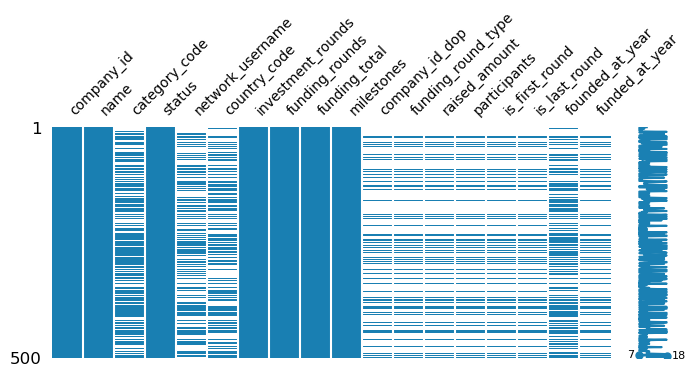

In [53]:
matrix(company_and_rounds_df.sample(500), figsize=(8,3), fontsize=10, color=(0.1, 0.5, 0.7))

В результате анализа пропусков можно сказать следущее:
- В основном датафрейме `company_and_rounds_df` объем пропусков в таких столбцах как `category_code`, `founded_at_year`, `country_code`, `network_username`, `is_last_round`, `is_first_round`, `participants`, `raised_amount`, `funding_round_type` и `funded_at_year` от 34 до 76 %
- Из анализа пропусков в датафрейме `company_and_rounds_df` явно прослеживается таблица в таблице
- В датафреймах о сотрудниках от 10 до 85%
- Часть пропусков возможно заполнить, пропуски одних столбцов заполнить другими и проанализировать итоговые данные на пропуски.

### Предобработка данных, предварительное исследование

---
#### Задание

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета company_and_rounds.csv.
- Составим сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
  - типичный размер средств, выделяемый в рамках одного раунда;
  - общее количество раундов финансирования за этот год.
- Оставим в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

**Раунды финансирования по годам**


!!! Стоит отметить, что столбец `raised_amount` имеет 75,7% пропусков, в то время как столбеец `funding_total` с данными похожей направленности всего 0,1%

In [54]:
# Сгрупируем данные, посчитаем и выведем результат
pivot_amount_rounds = company_and_rounds_df.pivot_table(index='funded_at_year', 
                                                        values=['raised_amount', 'funding_rounds'], 
                                                        aggfunc={'raised_amount':'sum',
                                                                 'funding_rounds':'sum'})
# Добавляем новый столбец, который будет средним значением raised_amount, деленным на сумму funding_rounds
pivot_amount_rounds['avg_amount'] = (pivot_amount_rounds['raised_amount']/ pivot_amount_rounds['funding_rounds']).round(2)

# Удалим лишние столбцы
pivot_amount_rounds = pivot_amount_rounds.drop(columns=['raised_amount'])

# Отфильтруем по суммарному количеству раундов более 50
pivot_amount_rounds = pivot_amount_rounds[pivot_amount_rounds['funding_rounds'] > 50].reset_index()
pivot_amount_rounds.columns = ['funded_at_year', 'funding_rounds', 'avg_amount']

display(pivot_amount_rounds.style.background_gradient(cmap='coolwarm', axis=0))

,funded_at_year,funding_rounds,avg_amount
0,1998,72,2126.930000
1,1999,268,2104.250000
2,2000,403,3562.500000
3,2001,302,2785.120000
4,2002,385,2361.040000
5,2003,569,1599.790000
6,2004,1057,2090.590000
7,2005,4157,3663.100000
8,2006,6295,3252.230000
9,2007,8494,3447.730000


In [55]:
# Средняя сумма финансирования
print(f'Итого средняя сумма финансирования за один раунд в год, тыс.дол:')
print(round(pivot_amount_rounds['avg_amount'].mean(),2))

Итого средняя сумма финансирования за один раунд в год, тыс.дол:
2884.22


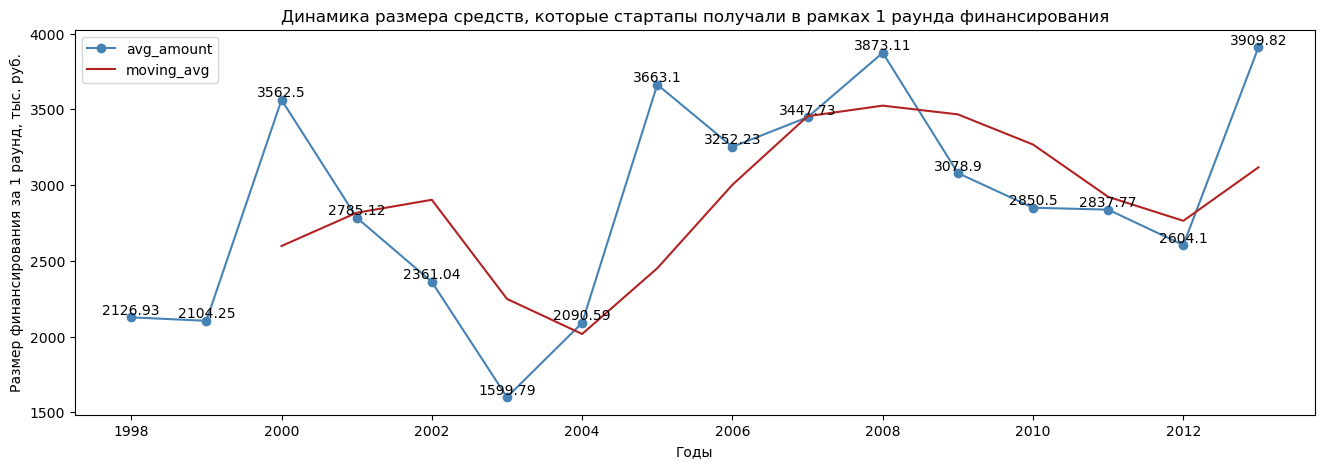

In [56]:
# Добавляем расчет скользящей средней
pivot_amount_rounds['moving_avg'] = pivot_amount_rounds['avg_amount'].rolling(window=3).mean()

# Строим график
pivot_amount_rounds.plot(kind='line',
                         x='funded_at_year',
                         y='avg_amount',
                         legend=True,
                         title='Динамика размера средств, которые стартапы получали в рамках 1 раунда финансирования',
                         color='steelblue',
                         marker='o', # Установка маркера для точек 
                         figsize=(16, 5),
                         grid=True)

# Строим график скользящей средней
pivot_amount_rounds.plot(kind='line',
                         x='funded_at_year',
                         y='moving_avg',
                         legend=True,
                         color='firebrick',
                         ax=plt.gca())

# Добавляем значения на график
for i, value in enumerate(pivot_amount_rounds['avg_amount']):
        plt.text(pivot_amount_rounds['funded_at_year'][i], value, str(round(value, 2)), ha='center', va='bottom')
        
# Устанавливаем названия по осям
plt.xlabel('Годы')
plt.ylabel('Размер финансирования за 1 раунд, тыс. руб.')

# Выводим график
plt.show()

- В 2013 году средний объем средств, которые получил стартап в рамках 1 раунда был максимальным и составил 3 909.82 тыс. дол
- В 2003 году средний объем средств, которые получил стартап в рамках 1 раунда был минимальным и составил 1 599.79 тыс. дол

**Проанализируем 2013 год**

- Сгруппируем и отфильтруем данные и выведем сводную таблицу размера средств, которые стартапы получали в рамках 1 раунда финансирования в разрезе  стартапов за 2013 год
- Изучим стат-данные и визуализируем данные

In [57]:
# Отфильтруем, сгрупируем данные, посчитаем и выведем результат
cr_df_2013 = company_and_rounds_df[(company_and_rounds_df['funded_at_year']==2013)&(
                                    company_and_rounds_df['raised_amount']!='Nan')&(
                                    company_and_rounds_df['funding_rounds']!='Nan')&(
                                    company_and_rounds_df['raised_amount']!=0)]

amount_rounds_2013 = cr_df_2013.groupby('company_id').agg({'raised_amount':'sum', 'funding_rounds':'sum'})

# Востановим все использованные столбцы, так как они нам понадобятся
amount_rounds_2013 = amount_rounds_2013.reset_index() 
amount_rounds_2013.columns = ['company_id', 'raised_amount', 'funding_rounds']

# Добавляем новый столбец, который будет средним значением raised_amount, деленным на сумму funding_rounds
amount_rounds_2013['avg_amount'] = (amount_rounds_2013['raised_amount']/amount_rounds_2013['funding_rounds']) 

# Удалим лишние столбцы
amount_rounds_2013 = amount_rounds_2013.drop(columns=['raised_amount'])

In [58]:
# Статистические данные столбца `funding_rounds` (количество раундов)
amount_rounds_2013['funding_rounds'].describe()

count      8590.0
mean     2.555297
std       3.05515
min           1.0
25%           1.0
50%           1.0
75%           3.0
max          52.0
Name: funding_rounds, dtype: Float64

In [59]:
# Статистические данные столбца `avg_amount` (объем средств финансированияб тыс.руб)
amount_rounds_2013['avg_amount'].describe()

count          8590.0
mean      6049.286883
std      47292.187882
min            0.7945
25%             262.5
50%            1000.0
75%            3250.0
max         2600000.0
Name: avg_amount, dtype: Float64

Так как данные имеют большой разброс, произведем логарифмические преобразования и на них произведем визуализацию

In [60]:
# Логарифмируем данные столбца `avg_amount`
amount_rounds_2013['log_avg_amount'] = np.log(amount_rounds_2013['avg_amount'])

- Для визуального анализа используем гисторгамму и диаграмму размаха. Визуализируем распределение:

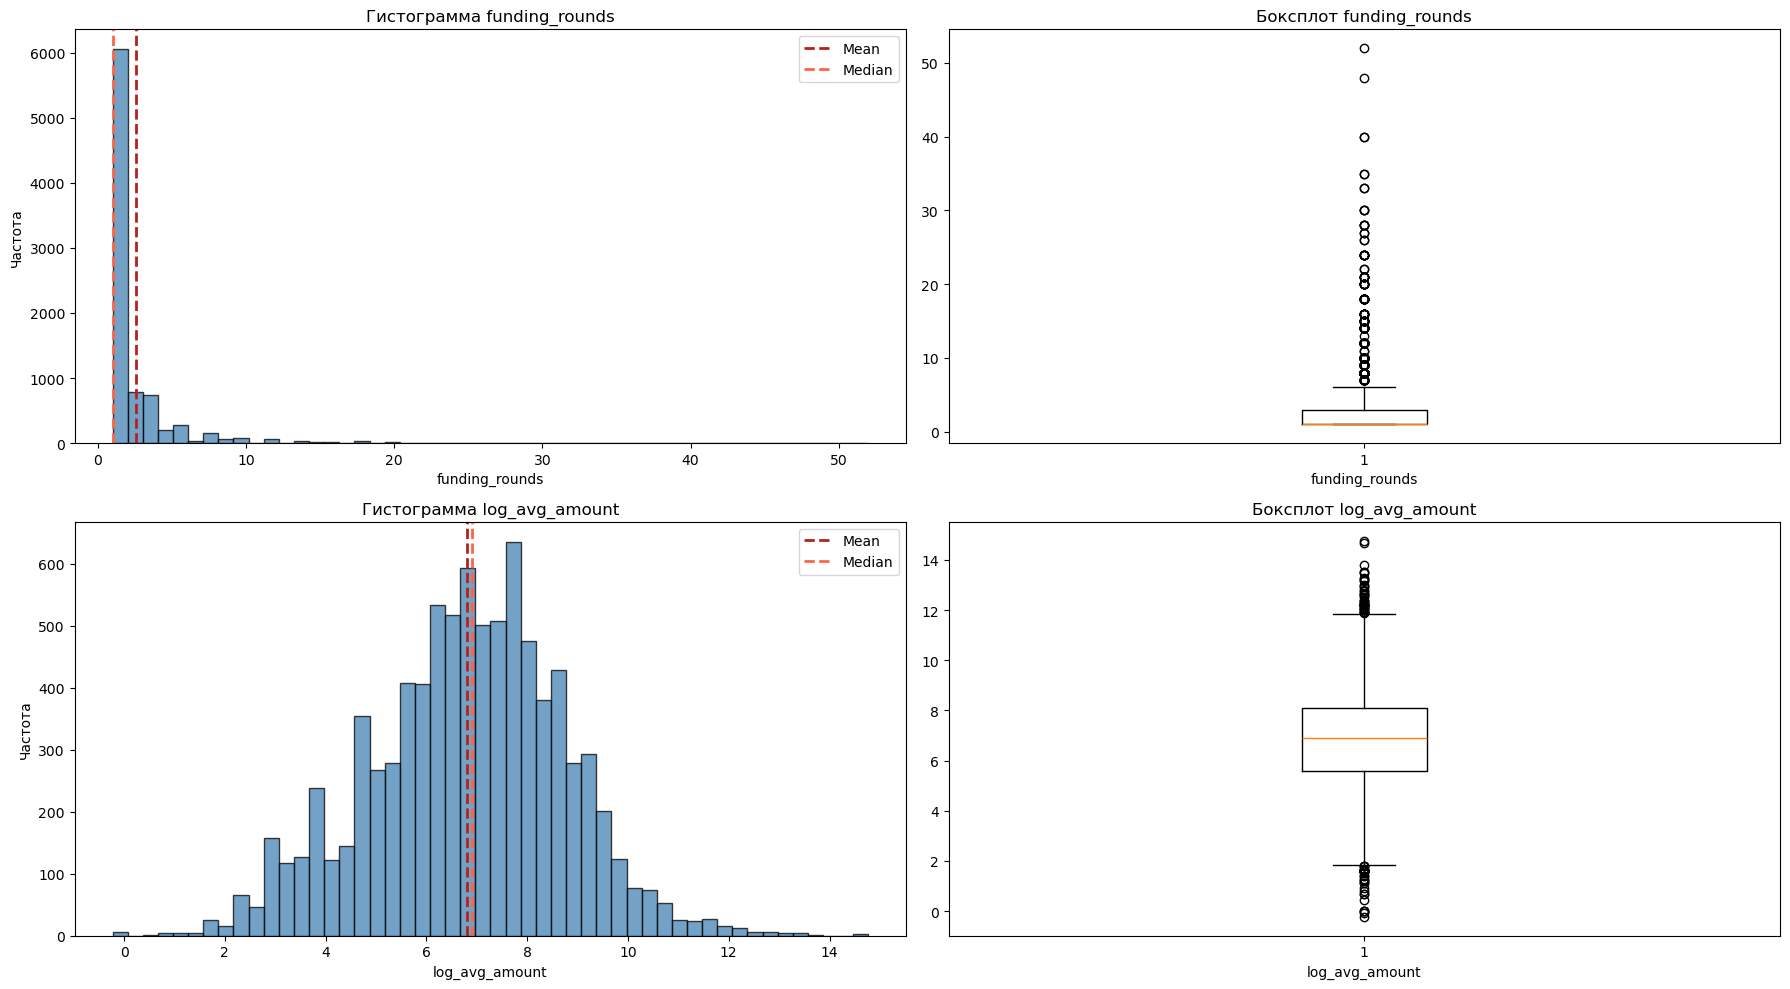

In [61]:
df_2013 = ['funding_rounds', 'log_avg_amount']

n_rows = len(df_2013)
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))

for i, column in enumerate(df_2013):
    round_2013 = amount_rounds_2013[column]

    ax = axes[i, 0] 
    ax.hist(round_2013, bins=50, alpha=0.75, color='steelblue', edgecolor='black')
    ax.axvline(round_2013.mean(), color='firebrick', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(round_2013.median(), color='tomato', linestyle='dashed', linewidth=2, label='Median')
    ax.set_title(f'Гистограмма {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Частота')
    ax.legend()
    
    ax = axes[i, 1] 
    ax.boxplot(round_2013)
    ax.set_title(f'Боксплот {column}')
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

**По результам исследования можно сказать следующие:**

- График гистограммы количества раундов инвестирования имеет аномалии (хвост удленен справа). Выбросы в большую сторону сдвигают диаграмму. Основные данные лежат в диапазоне от 1 до 3 раундов. Медиана равна 1,0.
- Гистограмма логарифмических данных средств финансирования близка к нормальному распределению. Наблюдаются множество выбросов в обе стороны. Медиана и среднее значение близки друг к другу.

---
#### Задание

* Оценить, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделить все компании на несколько групп по количеству сотрудников и оценить среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуовать выбранные границы групп.

* Оценить, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

**Люди и их образование**

- Соединим датафремы `people_df`, `education_df` и `degrees_df` по ранее преобразованному столбцу `person_id`
- Оценим результат
- Отфильтруем чать датафрейма и сгруппируем данные по компания, категоризируем компании по количеству сотрудников
- Посчитаем количество компаний в группах и среднее количество сотрудников

In [62]:
# Соединяем датафреймы по столбцам 'person_id' и уберем явные дубликаты
total_pes_df = people_df.merge(education_df, on='person_id', how='outer').merge(degrees_df, on='person_id', how='outer'
                                                                               ).drop_duplicates()

In [63]:
# Выведем информацию об объединенном датафрейме обо всех сотрудниках
total_pes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355792 entries, 0 to 371809
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   person_id          355792 non-null  int64 
 1   first_name         354860 non-null  object
 2   last_name          354865 non-null  object
 3   company_id         67020 non-null   Int64 
 4   network_username   77182 non-null   object
 5   instituition       197070 non-null  object
 6   graduated_at_year  109199 non-null  Int64 
 7   degree_type        179228 non-null  object
 8   subject            147359 non-null  object
dtypes: Int64(2), int64(1), object(6)
memory usage: 27.8+ MB


- В результате получаем датафрейм в котором 9 столбцов и 355 792 строк.

In [64]:
# Оценим уникальные данные
total_pes_df.nunique()

person_id            227088
first_name            28421
last_name            107771
company_id            22922
network_username      38421
instituition          21067
graduated_at_year        71
degree_type            7147
subject               20050
dtype: int64

In [65]:
# Подсчитываем долю строк с пропусками
(total_pes_df.isna().sum()/total_pes_df.shape[0]).sort_values(
    ascending=False).round(2).reset_index().style.background_gradient(cmap='coolwarm', axis=0)

,index,0
0,company_id,0.810000
1,network_username,0.780000
2,graduated_at_year,0.690000
3,subject,0.590000
4,degree_type,0.500000
5,instituition,0.450000
6,first_name,0.000000
7,last_name,0.000000
8,person_id,0.000000


*Данные неоднородны, имеют множество пропусков. Возможны строки с одним сотрудником и с разными данными о его образовании.*

In [66]:
# Отфильтруем датафрейм оставим только необходимые столбцы
filter_total_pes_df = total_pes_df[['person_id', 'company_id']].drop_duplicates()

In [67]:
# Сгрупируем данные, посчитаем и выведем результат
com_plus_pes = filter_total_pes_df.groupby('company_id')['person_id'].count().reset_index()

In [68]:
# Оценим статистически получившиеся рерультаты
display(f"Всего компаний {len(com_plus_pes)}", 
        f"максимальное количество сотрудников: {com_plus_pes['person_id'].max()}", 
        f"минимальное количество сотрудников: {com_plus_pes['person_id'].min()}", 
        f"среднее: {round(com_plus_pes['person_id'].mean(), 0)}", 
        f"медиана: {com_plus_pes['person_id'].median()}",
        f"стандартное отклонение: {round(com_plus_pes['person_id'].std(), 0)}")

'Всего компаний 22922'

'максимальное количество сотрудников: 244'

'минимальное количество сотрудников: 1'

'среднее: 2.0'

'медиана: 1.0'

'стандартное отклонение: 3.0'

In [69]:
# Преобразуем person_id в числовой тип, NaN для нечисловых значений
com_plus_pes['person_id'] = pd.to_numeric(com_plus_pes['person_id'], errors='coerce')

# Категоризируем компании по количеству сотрудников
com_plus_pes['category'] = pd.cut(com_plus_pes['person_id'], bins = [1, 16, 101, 251], labels = ["Микро", "Малые", "Средние"])

In [70]:
# Посчитаем количество сотрудников и среднее
com_plus_pes.groupby('category')['person_id'].agg(['count', 'mean'])

C:\Users\dima_\AppData\Local\Temp\ipykernel_7440\1926856005.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  com_plus_pes.groupby('category')['person_id'].agg(['count', 'mean'])


,count,mean
category,,
Микро,4763,3.106026
Малые,39,30.051282
Средние,3,177.333333


In [71]:
# Посчитаем количесвто компаний без указаний сотрудников
com_plus_pes['category'].isna().sum()

18117

**По результам исследования можно сказать следующие:**

- Соединение 3 датафреймов возможно, но по итогу мы получаем данные с большим количеством пробелов.
- Категоризацию компаний произвели по критериям размеров бизнеса: микро - штат не превышает 15, малые от 16 до 100 и Средние до 250 сотрудников. (Так как максимальное количество сотрудников равнялось 244, макро организации не вошли в категории)
- Большиство из имеющих компаний категории "Микро" со средним количеством сотрудников 3 чел, что логично для стартапов.

---
#### Задание

- Установить, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оценить, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [72]:
# Отфильтруем датасеты убрав пустые поля в соответствующих столбцах и выведем количество итоговых строк
company_df_net = company_and_rounds_df.dropna(subset=['network_username'])
display(len(company_df_net['network_username']))

people_df_net = people_df.dropna(subset=['network_username'])
display(len(people_df_net['network_username']))

# Находим совпадения
matches = pd.merge(company_df_net, people_df_net, on='network_username', how='inner')
display(len(matches))

95534

38867

2580

**Объединять или не объединять**

In [73]:
round(len(matches)/(len(company_df_net['network_username'])), 4)

0.027

*Столбец `network_username` не подходит для объединения датафреймов, так как данные из этого столбца совпадают только в 2,7%.*

**По результам исследования можно сказать следующие:**

- Количество непустых полей в столбце `network_username` в датафрейме `company_and_rounds_df` 95 534 строки
- Количество непустых полей в столбце `network_username` в датафрейме `people_df` 38 867 строки
- Только в 2,7 % найдены совпадения по строках датафреймов в этих столбцах, и это без учета совпадения с другими данными.
- Вывод: столбец `network_username` не подходит для объединения данных.

---
#### Задание

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовить данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.


**Проблемный датасет и причина возникновения пропусков**

- Разделим датафрейм `company_and_rounds_df` на две части, в одной останется информация о компаниях и раундах (столбцы 0-9 включительно), во второй только данные о раундах финансирования в разрезе от общих сумм финансирования столбца `funding_total` (10-17 включительно). 

In [74]:
# Выведем изначальное количество строк
zero_len_cr = len(company_and_rounds_df)
print(zero_len_cr)

217774


In [75]:
# Выделим датафрейм `company_df`
company_df = pd.concat([company_and_rounds_df.iloc[:, 0:10], company_and_rounds_df.iloc[:, 16]], axis=1)

In [76]:
# Выделим датафрейм `rounds_df`
rounds_df = company_and_rounds_df.iloc[:, 10:].drop(columns=['founded_at_year'])

- Обработаем новый датафрейм `company_df`
- Ранее в предобработке столбеца `company_id`, мы выявили наличие 302 пропусков, которые возшли в датафрейм `rounds_df`, поэтому из данного датафрейма эти пустые значения удалим (заметно это же пропущенное количество в столбцах `name` и `status`, `investment_rounds` и `funding_rounds`, `funding_total` и `milestones`. 
- Столбец `network_username` можно удалить, как излишнюю информацию (к тому же по данному столбцу невозможно заполнить пропуски в столбце `name`, так как пропуски в этих столбцах совпадают)

In [77]:
# Удалим лишние столбцы и пустые поля
company_df = company_df.dropna(subset=['company_id', 'name', 'status'])
company_df = company_df.drop(columns=['network_username'])

In [78]:
duplicated = company_df.duplicated().sum()
print(duplicated)

20919


In [79]:
# Уберем дубликаты
company_df = company_df.drop_duplicates()

In [80]:
# Посчитаем количество удалённых строк в относительном значении
print(round(1 - (len(company_df)/zero_len_cr), 4))

0.0974


In [81]:
# Проверим результат
company_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196552 entries, 0 to 217469
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   company_id         196552 non-null  Int64  
 1   name               196552 non-null  object 
 2   category_code      123186 non-null  object 
 3   status             196552 non-null  object 
 4   country_code       87990 non-null   object 
 5   investment_rounds  196552 non-null  Int64  
 6   funding_rounds     196552 non-null  Int64  
 7   funding_total      196552 non-null  float64
 8   milestones         196552 non-null  Int64  
 9   founded_at_year    91226 non-null   Int64  
dtypes: Int64(5), float64(1), object(4)
memory usage: 17.4+ MB


- Обработаем новый датафрейм `rounds_df` (используем дубликаты для удобства удаления и пустых строк в нужных столбцах)

In [82]:
duplicated = rounds_df.duplicated().sum()
print(duplicated)

164949


In [83]:
# Уберем дубликаты
rounds_df = rounds_df.drop_duplicates()

In [84]:
# Посчитаем количество удалённых строк в относительном значении
print(round(1 - (len(rounds_df)/zero_len_cr), 4))

0.7574


In [85]:
# Проверим результат
rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52825 entries, 0 to 217773
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company_id_dop      52824 non-null  Int64  
 1   funding_round_type  52824 non-null  object 
 2   raised_amount       52824 non-null  float64
 3   participants        52824 non-null  Int64  
 4   is_first_round      52824 non-null  Int64  
 5   is_last_round       52824 non-null  Int64  
 6   funded_at_year      52578 non-null  Int64  
dtypes: Int64(5), float64(1), object(1)
memory usage: 3.5+ MB


**По результам исследования можно сказать следующие:**

- Получено 2 датафрейма по данным о компаниях и о раундах финансирования
- Итоговый датафрейм `company_df` содержит 10 столбцов и 196 552 строки
- Итоговый датафрейм `rounds_df` содержит 7 столбцов и 52 825 строк


## Исследовательский анализ объединённых таблиц


---
#### Задание

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний.
В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, !или! те, у которых в колонке `status` указано `acquired`.
Далее работайте только с этими данными.


**Объединение данных**

- Отфильтровали итоговый датафрейм `company_df`: значения `funding_rounds` или `investment_rounds` больше нуля, !или! те, у которых в колонке `status` указано `acquired`(Остальные датафреймы присоединим в случае необходимости)

In [86]:
# Отфильтруем датафрей company_df
filter_company_df = company_df[(company_df['funding_rounds']>0) | (company_df['investment_rounds']>0) | (company_df['status']=='acquired')]

In [87]:
# Проверим результат
filter_company_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40747 entries, 0 to 217469
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company_id         40747 non-null  Int64  
 1   name               40747 non-null  object 
 2   category_code      35315 non-null  object 
 3   status             40747 non-null  object 
 4   country_code       34742 non-null  object 
 5   investment_rounds  40747 non-null  Int64  
 6   funding_rounds     40747 non-null  Int64  
 7   funding_total      40747 non-null  float64
 8   milestones         40747 non-null  Int64  
 9   founded_at_year    27807 non-null  Int64  
dtypes: Int64(5), float64(1), object(4)
memory usage: 3.6+ MB


In [88]:
filter_company_df.head()

,company_id,name,category_code,status,country_code,investment_rounds,funding_rounds,funding_total,milestones,founded_at_year
0,1,Wetpaint,web,operating,USA,0,3,39750.0,5,2005
3,10,Flektor,games_video,acquired,USA,0,0,0.0,0,<NA>
4,100,There,games_video,acquired,USA,0,0,0.0,4,<NA>
15,1001,FriendFeed,web,acquired,USA,0,1,5000.0,3,2007
20,10014,Mobclix,mobile,acquired,USA,0,1,0.0,4,2008


**По результам можно сказать следующие:**

- Получен датафрейм по данным о компаниях и о раундах финансирования в котором 10 столбцов и 40 747 строк

In [89]:
# Зафиксируем количество строк
zero_len_df = len(filter_company_df)
print(zero_len_df)

40747


---
#### Задание

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

По предобработанному столбцу `funding_total` графическим способом оценить, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

Рассчитайть аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и указать, каким процентилям границы соответствуют. Учитывая озвученные выше предпосылки и собственные соображения, сделайть выводы о корректности планируемой заказчиком замены нижней и верхней границы выбросов на значения, рассчитанные по процентилям.

**Анализ выбросов**

- Оценим данные столбца `funding_total`
- Визуализируем результаты
- Исходя из результатов исследования обработаем датафрейм от выбросов

In [90]:
# Статистические данные столбца `funding_rounds` (количество раундов)
filter_company_df['funding_total'].describe()

count    4.074700e+04
mean     1.013561e+04
std      5.646436e+04
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+02
75%      5.650650e+03
max      5.700000e+06
Name: funding_total, dtype: float64

- Так как данные имеют большой разброс, произведем логарифмические преобразования и на них произведем визуализацию
- Отфильтруем данные, отберем только поля, где сумма финансирования стартапа больше 0,0

In [91]:
# Уберем нулевые значения (необходимо для логорифма)
ft_company_df = filter_company_df[filter_company_df['funding_total']>0]

In [92]:
# Зафиксируем количество строк
ft_len = len(ft_company_df)
print(ft_len)

27874


In [93]:
# Логарифмируем данные столбца `funding_total`
ft_company_df['log_funding_total'] = np.log(ft_company_df['funding_total'])

C:\Users\dima_\AppData\Local\Temp\ipykernel_7440\2460592362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ft_company_df['log_funding_total'] = np.log(ft_company_df['funding_total'])


- Визуализируем данные: построим гистограмму распределения значений и диаграмму размаха для логарифмически преобразованного столбца `log_funding_total`, чтобы рассмотреть аномалии в данных

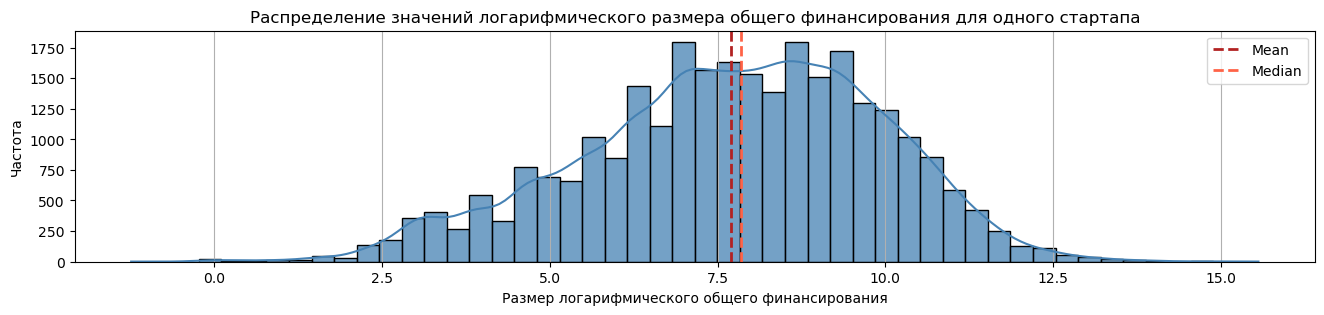

In [94]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
ax = sns.histplot(ft_company_df['log_funding_total'],
                bins=50, # Устанавливаем количество корзин
                alpha=0.75,
                color='steelblue',
                edgecolor='black',
                kde=True) # Добавляем KDE

# Добавим на диаграмму среднее и медиану
ax.axvline(ft_company_df['log_funding_total'].mean(), color='firebrick', linestyle='dashed', linewidth=2, label='Mean')
ax.axvline(ft_company_df['log_funding_total'].median(), color='tomato', linestyle='dashed', linewidth=2, label='Median')
ax.legend()

# Настраиваем оформление графика
ax.set_title('Распределение значений логарифмического размера общего финансирования для одного стартапа')
ax.set_xlabel('Размер логарифмического общего финансирования')
ax.set_ylabel('Частота')

# Добавляем сетку графика
plt.grid(axis='x')

# Выводим график
plt.show()

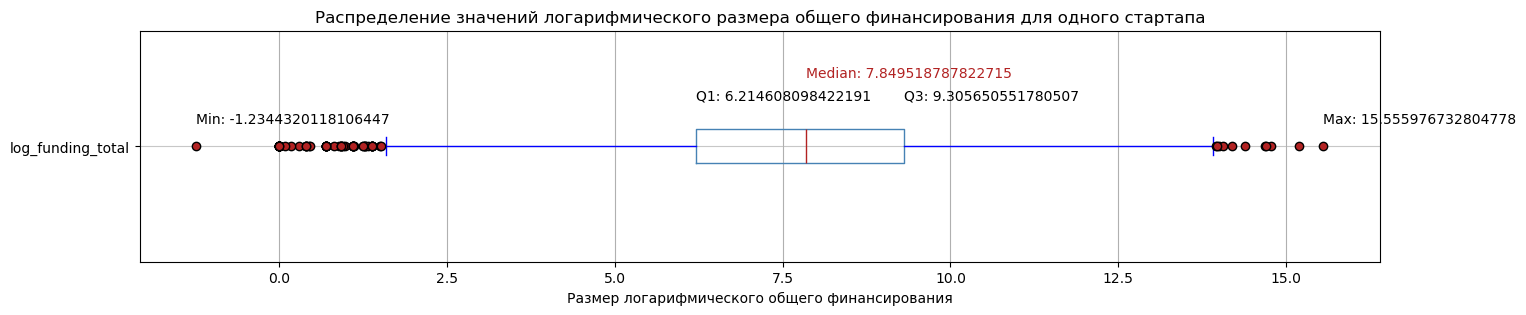

In [95]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16, 3))


# Строим диаграмму размаха значений в столбце score
ft_company_df.boxplot(column='log_funding_total',
                 vert=False,
                 boxprops=dict(color='steelblue'),  # Цвет ящика
                 whiskerprops=dict(color='blue'),  # Цвет усов
                 capprops=dict(color='blue'),  # Цвет концов усов
                 flierprops=dict(markerfacecolor='firebrick', marker='o'),  # Настройки для выбросов
                 medianprops=dict(color='firebrick'),  # Цвет медианы                 
)

# Добавляем заголовок и метки оси
plt.title('Распределение значений логарифмического размера общего финансирования для одного стартапа')
plt.xlabel('Размер логарифмического общего финансирования')
   
# Выводим график
plt.grid(axis='y', alpha=0.7)

# Получаем данные о ящике и усах
median = ft_company_df['log_funding_total'].median()
q1 = ft_company_df['log_funding_total'].quantile(0.25)
q3 = ft_company_df['log_funding_total'].quantile(0.75)
min_val = ft_company_df['log_funding_total'].min()
max_val = ft_company_df['log_funding_total'].max()

# Добавляем текст значений ящика и усов
plt.text(min_val, 1.1, f'Min: {min_val}', color='black')
plt.text(q1, 1.2, f'Q1: {q1}', color='black')
plt.text(median, 1.3, f'Median: {median}', color='firebrick')
plt.text(q3, 1.2, f'Q3: {q3}', color='black')
plt.text(max_val, 1.1, f'Max: {max_val}', color='black')

plt.show()

- Гистограмма логарифмически преобразованного столбца `fundinf_total` близка к нормальному распределению, медиана и среднее находятся рядом, но диаграмма размаха выявляет большое количество выбросов как в большую, так и в меньшую сторону. Произведем корректировку данных самого столбца `fundinf_total` в пределах "усов ящика" и оценним данных исходя из этих реалий.

- Обработаем исходный датафрейм от выбросов

In [96]:
# Вычисляем квартили Q1 и Q3
Q1 = filter_company_df['funding_total'].quantile(0.25)
Q3 = filter_company_df['funding_total'].quantile(0.75)

# Вычисляем межквартильный размах IQR
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR # усы
lower_bound = Q1 - 1.5*IQR
# Выведем датафрейм отфильтрованный на стандартное положение размаха
standart_ft_company_df = filter_company_df[(filter_company_df['funding_total'] >= lower_bound) & (filter_company_df['funding_total'] <= upper_bound)]
# Рассчитаем количество итогых строк
standart_com_count = standart_ft_company_df['company_id'].count()
print(standart_com_count)
# Выведем процент остатка данных
print(round(standart_com_count*100/zero_len_df,2))

34889
85.62


- Процент отфильтровывания данных 15% высоковат, поэтому раздвинем границы с помощью процентилей (уберем 5 %, как количество допустимой ошибки)

In [97]:
# Определяем верхний порог для выбросов
upper_bound = filter_company_df['funding_total'].quantile(0.975) # Раздвинем границы усов

# Определяем нижний порог для выбросов
lower_bound = filter_company_df['funding_total'].quantile(0.075)

# Отфильтровываем данные
ft_company_df_new = filter_company_df[(filter_company_df['funding_total'] >= lower_bound) & (filter_company_df['funding_total'] <= upper_bound)]

In [98]:
# Выведем статистические данные итогового датафрейма
(ft_company_df_new['funding_total']).describe()

count    39728.000000
mean      5480.812232
std      11419.682986
min          0.000000
25%          0.000000
50%        500.000000
75%       5000.000000
max      74000.000000
Name: funding_total, dtype: float64

- Визуализируем данные: построим гистограмму распределения значений итогового столбца `funding_total`

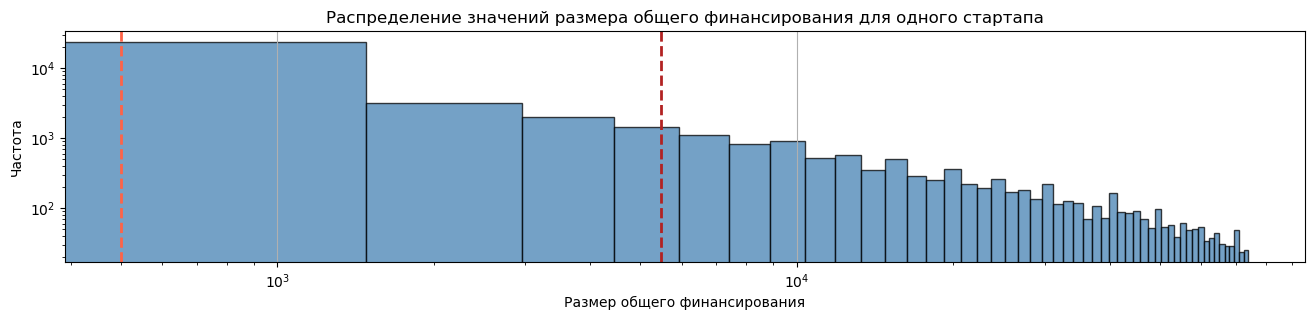

In [99]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
plt.hist((ft_company_df_new['funding_total']),
                bins=50, # Устанавливаем количество корзин
                alpha=0.75,
                color='steelblue',
                edgecolor='black',
                log=True)

# Добавим на диаграмму среднее и медиану
plt.axvline((ft_company_df_new['funding_total']).mean(), color='firebrick', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline((ft_company_df_new['funding_total']).median(), color='tomato', linestyle='dashed', linewidth=2, label='Median')
ax.legend()


# Настраиваем оформление графика
plt.title('Распределение значений размера общего финансирования для одного стартапа')
plt.xlabel('Размер общего финансирования')
plt.ylabel('Частота')

# Устанавливаем границы осей, чтобы начать с нуля
plt.xscale('log')

# Добавляем сетку графика
plt.grid(axis='x')

# Выводим график
plt.show()

In [100]:
# Зафиксируем итоговое количество строк датафрейма `ft_company_df_new`
new_com_count = ft_company_df_new['company_id'].count()
print(new_com_count)

39728


In [101]:
# Выведем относительный остаток данных
print(round(new_com_count/zero_len_df,2))

0.97


**По результам исследования можно сказать следующие:**

- 97 % стартапов получили финансирования в районе до 74 000 тыс. долларов
- Гистограмма правого распределения (хвост справа), говорит о том, что чем больше сумма финансирования, тем меньшее количество стартапов ее получили. 
- Медианное значение 500 тыс. долларов

---
#### Задание

Исследуем компании, которые были проданы за один доллар или бесплатно, и при этом известно, что у них был ненулевой общий объём финансирования.

**Куплены забесплатно**

- Объединим итоговый датафрейм `ft_company_df_new`(где общий объем финансирования больше 0) и `acquisition_df` (Добавим данные исходя из соответствия)
- Добавим столбец исходя из суммы оплаты за стартап (True - цена до 1 доллара включительно или "бесплатно", False - "за деньги")
- Визуализируем данные
- Оценим корелляцию продажи стартапа с помощью нового столбца
- Рассмотрим взаимосвязь цены продажи стартапа, раундов и суммы финансирования по годам

In [102]:
# Объеденим датафреймы о компаниях и райдах с продажами стартапов
company_plus_acquisition = ft_company_df_new.merge(acquisition_df, left_on='company_id', right_on='acquired_company_id', how='inner')

In [103]:
# Выведем результат
company_plus_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9286 entries, 0 to 9285
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company_id            9286 non-null   Int64  
 1   name                  9286 non-null   object 
 2   category_code         6471 non-null   object 
 3   status                9286 non-null   object 
 4   country_code          6593 non-null   object 
 5   investment_rounds     9286 non-null   Int64  
 6   funding_rounds        9286 non-null   Int64  
 7   funding_total         9286 non-null   float64
 8   milestones            9286 non-null   Int64  
 9   founded_at_year       4725 non-null   Int64  
 10  id                    9286 non-null   int64  
 11  acquiring_company_id  9286 non-null   int64  
 12  acquired_company_id   9286 non-null   int64  
 13  term_code             1795 non-null   object 
 14  price_amount          9286 non-null   float64
 15  acquired_at_year     

In [104]:
# Зафиксируем количество строк
count_ca = len(company_plus_acquisition)
print(count_ca)

9286


- Итого 16 столбцов и 9286 строк

In [105]:
# Создадим столбец `price_dollar` с помощью функции create_price_dollar
def create_price_dollar(x):
    if 0<=x<=1:
        return True
    return False
    
company_plus_acquisition['price_dollar'] = company_plus_acquisition['price_amount'].apply(create_price_dollar)

In [106]:
# Оценим результат
company_plus_acquisition.head()

,company_id,name,category_code,status,country_code,investment_rounds,funding_rounds,funding_total,milestones,founded_at_year,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at_year,price_dollar
0,10,Flektor,games_video,acquired,USA,0,0,0.0,0,<NA>,1,11,10,NaN,20000.0,2007,False
1,100,There,games_video,acquired,USA,0,0,0.0,4,<NA>,20,377,100,cash,0.0,2005,True
2,1001,FriendFeed,web,acquired,USA,0,1,5000.0,3,2007,1901,5,1001,cash_and_stock,47500.0,2009,False
3,10014,Mobclix,mobile,acquired,USA,0,1,0.0,4,2008,3878,23054,10014,NaN,0.0,2010,True
4,100265,Coastal Supply Company,NaN,acquired,NaN,0,0,0.0,1,<NA>,6106,38215,100265,NaN,0.0,2011,True


- Визуализируем данные диаграмм: построим диаграмму распределения значений столбца `price_dollar`

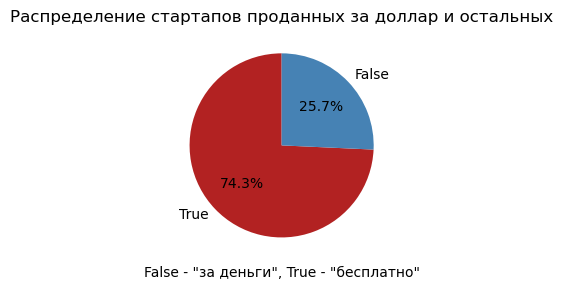

In [107]:
# Создаем переменную данных
df = company_plus_acquisition['price_dollar'].value_counts(normalize=True)

# Считаем результаты датафрейма для подписей
labels = df.reset_index()

# Список цветов
colors = ['firebrick', 'steelblue']

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16, 3))

# Строим круговую диаграмму total
axes = df.plot(kind='pie', # Тип графика - круговая диаграмма
             autopct = '%1.1f%%',
             colors=colors,
             labels=labels['price_dollar'].astype(str),
             startangle=90)

# Настраиваем оформление графика
axes.set_xlabel('False - "за деньги", True - "бесплатно"')
axes.set_ylabel('')

# Настраиваем названия графиков
axes.set_title('Распределение стартапов проданных за доллар и остальных')

# Поворот графика
axes.set_aspect('equal')

# Изменение компоновки графиков
plt.tight_layout()
plt.show()

- Как видим из графика количество проданных стартапов "бесплатно" в три раза превышает проданные стартапы "за деньги"

- Оценим корреляцию цены продажи стартапа по столбцу `price_dollar`

In [108]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = company_plus_acquisition[['investment_rounds', 
                         'funding_rounds', 
                         'funding_total', 
                         'milestones', 
                         'term_code',
                         'acquired_at_year',
                         'price_amount',
                         'price_dollar'
                         ]].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной price_dollar')
correlation_matrix.loc[correlation_matrix.index != 'price_dollar'][['price_dollar']].sort_values(by='price_dollar', ascending=False)

interval columns not set, guessing: ['investment_rounds', 'funding_rounds', 'funding_total', 'milestones', 'acquired_at_year', 'price_amount']
Корреляционная матрица с коэффициентом phi_k для переменной price_dollar


,price_dollar
funding_total,0.162133
acquired_at_year,0.114967
milestones,0.094801
funding_rounds,0.076507
term_code,0.045879
investment_rounds,0.024347
price_amount,0.000000


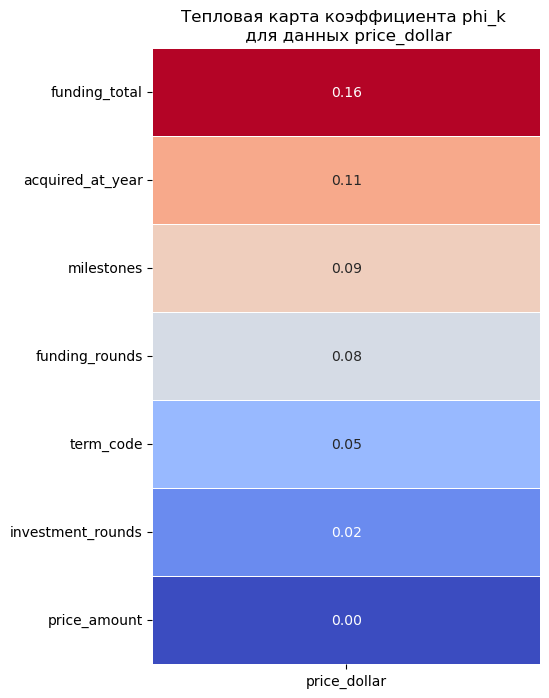

In [109]:
# Строим тепловую карту
plt.figure(figsize=(5, 8))

# Сохраняем матрицу корреляции рейтинга с другими данными
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'price_dollar'][['price_dollar']].sort_values(by='price_dollar', 
                                                                                                    ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
)

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных price_dollar')
plt.xlabel('')

# Выводим график
plt.show()

- В общем корреляции очень слабые.
- Наибольшая положительная корреляция с данными столбца `funding_total` - 0.16

- Рассмотрим ближе взаимосвязь таких данных раунды и суммы финансирования в зависимости от года продажи

In [110]:
# Сгрупируем данные, посчитаем и выведем результат
pivot_ca = company_plus_acquisition.pivot_table(index='acquired_at_year', 
                                                columns='price_dollar', 
                                                values=['acquired_company_id', 'funding_rounds', 'funding_total'], 
                                                aggfunc={'acquired_company_id':'count', 'funding_total':'mean', 'funding_rounds':'mean'})

# Дадим названия столбцам
pivot_ca = pivot_ca.reset_index().dropna()
pivot_ca.columns = ['acquired_at_year', 
                    'count_False', 
                    'count_True', 
                    'funding_rounds_False', 
                    'funding_rounds_True',
                    'funding_total_False', 
                    'funding_total_True']

display(pivot_ca.style.background_gradient(cmap='coolwarm', axis=0))

,acquired_at_year,count_False,count_True,funding_rounds_False,funding_rounds_True,funding_total_False,funding_total_True
4,1984,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
11,1992,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
12,1993,3.000000,6.000000,0.333333,0.000000,9333.333333,0.000000
14,1995,2.000000,19.000000,0.000000,0.000000,0.000000,0.000000
16,1997,6.000000,28.000000,0.166667,0.000000,2930.783333,0.000000
17,1998,5.000000,39.000000,0.200000,0.051282,0.000000,87.179487
18,1999,25.000000,64.000000,0.320000,0.000000,1600.000000,0.000000
19,2000,13.000000,64.000000,0.153846,0.015625,2019.230769,0.781250
20,2001,14.000000,41.000000,0.000000,0.097561,0.000000,611.821951
21,2002,13.000000,38.000000,0.076923,0.078947,0.000000,197.368421


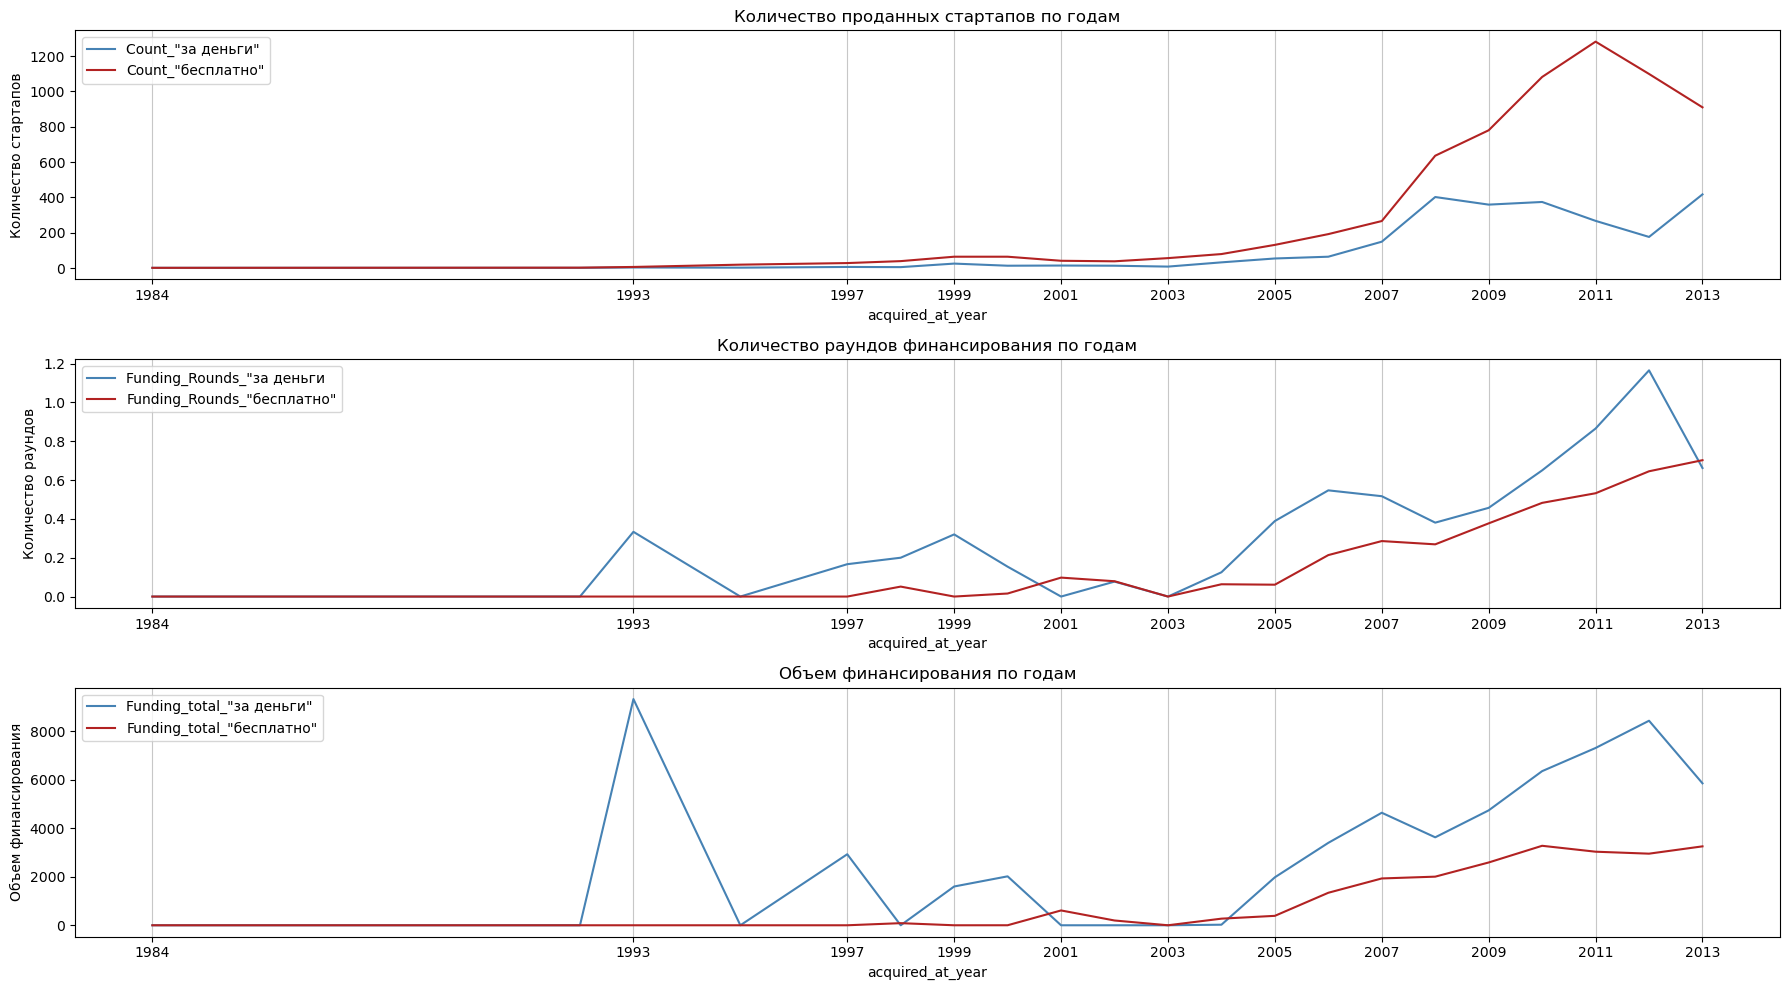

In [111]:
# Разделим получившующя таблицу на 3 подграфика
df_1 = pivot_ca[['acquired_at_year', 'count_False', 'count_True']]
df_2 = pivot_ca[['acquired_at_year', 'funding_rounds_False', 'funding_rounds_True']]
df_3 = pivot_ca[['acquired_at_year', 'funding_total_False',	'funding_total_True']] 

fig, axes = plt.subplots(3, 1, figsize=(18, 10))

# График 1 - Количество стартапов
sns.lineplot(data=df_1, x='acquired_at_year', y='count_False', ax=axes[0], label='Сount_"за деньги"', color='steelblue')
sns.lineplot(data=df_1, x='acquired_at_year', y='count_True', ax=axes[0], label='Сount_"бесплатно"', color='firebrick')


axes[0].set_title('Количество проданных стартапов по годам')
axes[0].set_ylabel('Количество стартапов')
axes[0].legend(loc='upper left')
axes[0].grid(axis='x', alpha=0.7) 

# Устанавливаем все названия по оси Х
axes[0].set_xticks(ticks=pivot_ca['acquired_at_year'][::2])  # Используем labels для задания имен

# График 2 - Количество раундов
sns.lineplot(data=df_2, x='acquired_at_year', y='funding_rounds_False', ax=axes[1], label='Funding_Rounds_"за деньги', color='steelblue')
sns.lineplot(data=df_2, x='acquired_at_year', y='funding_rounds_True', ax=axes[1], label='Funding_Rounds_"бесплатно"', color='firebrick')


axes[1].set_title('Количество раундов финансирования по годам')
axes[1].set_ylabel('Количество раундов')
axes[1].legend(loc='upper left')
axes[1].grid(axis='x', alpha=0.7)

# Устанавливаем все названия по оси Х
axes[1].set_xticks(ticks=pivot_ca['acquired_at_year'][::2])  # Используем labels для задания имен

# График 3 - Объем финансирования
sns.lineplot(data=df_3, x='acquired_at_year', y='funding_total_False', ax=axes[2], label='Funding_total_"за деньги"', color='steelblue')
sns.lineplot(data=df_3, x='acquired_at_year', y='funding_total_True', ax=axes[2], label='Funding_total_"бесплатно"', color='firebrick')

axes[2].set_title('Объем финансирования по годам')
axes[2].set_ylabel('Объем финансирования')
axes[2].legend(loc='upper left')
axes[2].grid(axis='x', alpha=0.7)

# Устанавливаем все названия по оси Х
axes[2].set_xticks(ticks=pivot_ca['acquired_at_year'][::2])  # Используем labels для задания имен

# Изменение компоновки графиков
plt.tight_layout()
plt.show()

- Дополнительно проверим гипотезу: "финансируемые проекты покупают "бесплатно"
  (для этого посчитаем количество стартапов которые купили "бесплатно" и которые финансировались и разделим на общее количество стартапов, которые финансировались и продались)

In [112]:
# Посчитаем количество строк 
count_free = len(company_plus_acquisition[(company_plus_acquisition['price_amount']==0)&(company_plus_acquisition['funding_total']>0)])
print(count_free)
#
dolya_free = round(count_free/count_ca,2)
print(dolya_free)

1583
0.17


**По результам исследования можно сказать следующие:**

- 74.3% стартапов продаются "бесплатно".
- Наибольшую корреляцию с видом продажи "беслатно"/"за деньги" данные имеют с cуммой финансирования стартапов - коэффициент 0,16. Хотя в общем это слабая корреляция.
- Проанализируем взаимосвязь данных за период с 1984 по 2013 годы:
    - Взаимосвязь данных о количествое продаж "бесплатно"/"за деньги": количество "бесплатных" продаж до 2011 имела тенденцию роста, после начинается падение. Линия продаж стартапов "за деньги" до 2008 года плавный рост, затем плавный спад до 2012 и снова рост.
    - Взаимосвязь данных о количестве раундов финансирования стартапа и продаж "бесплатно"/"за деньги": в общем оба вида продаж имеют тенденцию к росту с ростом количества раундов финансирования, график продаж "за деньги" имеет большую динамику (скачки).
    - Взаимосвязь данных о сумме финансирования стартапов и продаж"бесплатно"/"за деньги": график "бесплатных" продаж имеет плавный рост, т.е. объемы финансирования растут меделеннно, как и количество "бесплатных" продаж. График продаж "за деньги можно поделить на три периода: с 1993 по 2001 скачки, с 2001 по 2012 рост и падение в 2013 году.
- Что кается гипотезы о том, что финансируемые стартапы продаются "бесплатно": можно сказать, что опровергнута, так как всего 17% из проданных финансируемых стартапов продались "бесплатно".

---
#### Задание

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

* наибольшими типичными ценами;
* и наибольшим разбросом цен за стартап.

Обосновать причины выбора категорий.

**Цены стартапов по категориям**

- Возмем для исследования датафрейм `company_plus_acquisition` содержащий в себе данные о продажах стартапов
- Оценим статистические показатели столбца с ценами продаж стартапов `price_amount`
- Визуализируем результаты
- Категоризируем данные по цене продажи стартапа
- Визуализируем категорию с наибольшим разбросом цен
- Рассмотрим цены стартапов в разрезе категорий столбца `category_code`

In [113]:
# Оценим статистические показатели 
company_plus_acquisition['price_amount'].describe()

count    9.286000e+03
mean     3.930322e+05
std      2.699596e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+01
max      2.600000e+09
Name: price_amount, dtype: float64

- Явные признаки выбросов, построим гистограмму и диаграмму размаха, предварительно офильтровав столбец на 0,95 процентиля как 5 % ошибки (в связи с тем что мах столбца цены продаж крайне высок) и офтильтруем нулевые продажи. (Данная фильтрация нужна только для этого анализа)

In [114]:
# Вычислим вехнюю границу
lower_bound = 0
upper_bound = company_plus_acquisition['price_amount'].quantile(0.95)
# Отфильтруем датафрейм
filter_company_plus_acquisition = company_plus_acquisition[(company_plus_acquisition['price_amount'] > lower_bound)&(company_plus_acquisition['price_amount'] < upper_bound)]

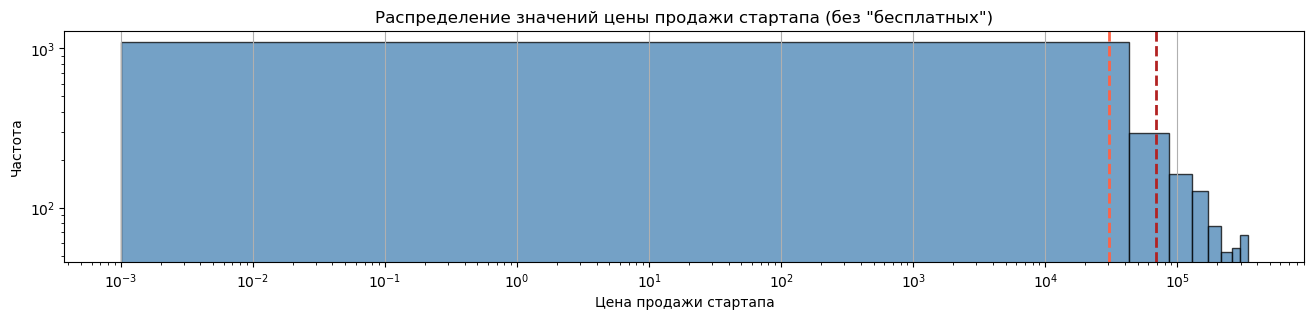

In [115]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
plt.hist(filter_company_plus_acquisition['price_amount'],
                bins=8, # Устанавливаем количество корзин
                alpha=0.75,
                color='steelblue',
                edgecolor='black',
                log=True)

# Добавим на диаграмму среднее и медиану
plt.axvline((filter_company_plus_acquisition['price_amount']).mean(), color='firebrick', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline((filter_company_plus_acquisition['price_amount']).median(), color='tomato', linestyle='dashed', linewidth=2, label='Median')
ax.legend()


# Настраиваем оформление графика
plt.title('Распределение значений цены продажи стартапа (без "бесплатных")')
plt.xlabel('Цена продажи стартапа')
plt.ylabel('Частота')

# Устанавливаем границы осей, чтобы начать с нуля
plt.xscale('log')

# Добавляем сетку графика
plt.grid(axis='x')

# Выводим график
plt.show()

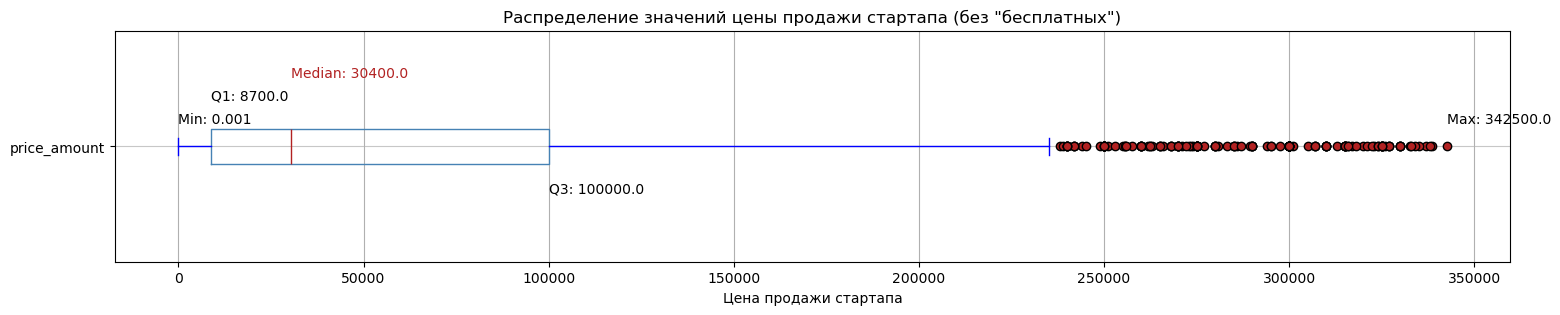

In [116]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(18, 3))

# Строим диаграмму размаха значений в столбце score
filter_company_plus_acquisition.boxplot(column='price_amount',
                 vert=False,
                 boxprops=dict(color='steelblue'),  # Цвет ящика
                 whiskerprops=dict(color='blue'),  # Цвет усов
                 capprops=dict(color='blue'),  # Цвет концов усов
                 flierprops=dict(markerfacecolor='firebrick', marker='o'),  # Настройки для выбросов
                 medianprops=dict(color='firebrick'))  # Цвет медианы

# Добавляем заголовок и метки оси
plt.title('Распределение значений цены продажи стартапа (без "бесплатных")')
plt.xlabel('Цена продажи стартапа')
   
# Выводим график
plt.grid(axis='y', alpha=0.7)

# Получаем данные о ящике и усах
median = filter_company_plus_acquisition['price_amount'].median()
q1 = filter_company_plus_acquisition['price_amount'].quantile(0.25)
q3 = filter_company_plus_acquisition['price_amount'].quantile(0.75)
min_val = filter_company_plus_acquisition['price_amount'].min()
max_val = filter_company_plus_acquisition['price_amount'].max()

# Добавляем текст значений ящика и усов
plt.text(min_val, 1.1, f'Min: {min_val}', color='black')
plt.text(q1, 1.2, f'Q1: {q1}', color='black')
plt.text(median, 1.3, f'Median: {median}', color='firebrick')
plt.text(q3, 0.8, f'Q3: {q3}', color='black')
plt.text(max_val, 1.1, f'Max: {max_val}', color='black')

plt.show()

In [117]:
# Оценим статистически получившиеся рерультаты
display(f"Всего проданных стартапов, включая нулевые продажи: {company_plus_acquisition['price_amount'].count()}", 
        f"Проданных стартапов (отфильтрованные): {filter_company_plus_acquisition['price_amount'].count()}",
        f"максимальная цена (отфильтрованные): {filter_company_plus_acquisition['price_amount'].max()}", 
        f"минимальная цена (отфильтрованные): {filter_company_plus_acquisition['price_amount'].min()}", 
        f"средняя цена (отфильтрованные): {round(company_plus_acquisition['price_amount'].mean(), 0)}", 
        f"медиана: {company_plus_acquisition['price_amount'].median()}",
        f"медиана (отфильтрованные): {filter_company_plus_acquisition['price_amount'].median()}")

'Всего проданных стартапов, включая нулевые продажи: 9286'

'Проданных стартапов (отфильтрованные): 1939'

'максимальная цена (отфильтрованные): 342500.0'

'минимальная цена (отфильтрованные): 0.001'

'средняя цена (отфильтрованные): 393032.0'

'медиана: 0.0'

'медиана (отфильтрованные): 30400.0'

- Из диаграмм видим большое количество выбросов (высоких цен стартапов), которые вытягивают хвоcт гистораммы вправо и это несмотря на фильтрацию.
- Медиана равна 30,4 млн. долларов без учета "бесплатных" и 5% выбросов
- Общая медиана продажи всех стартаповов стремится к 0, что говорит о большом количестве "бесплатных" и малооплачиваемых стартапов
- Итог логичный, чем больше цена продажи, тем меньше таких стартапов

- Категоризируем данные по цене продажи стартапа (цены в столбце в тыс. долларов)

In [118]:
# Зададим гранизу категорий и их названия
bins = [0, 1*(10**(-3)), 1, 10, 100, 1000, 10000, 100000, 1000000, np.inf]
labels = ["Бесплатно", "до 1000", "до 10000", "до 100000", "до 1000000", "до 10000000", "до 100000000", "до 1000000000", "выбросы"]

# Категоризируем стартапы по цене продажи
company_plus_acquisition['category'] = pd.cut(company_plus_acquisition['price_amount'], bins=bins, labels=labels, right=False)

In [119]:
# Посчитаем количество стартапов в категории и среднее
pivot_category = company_plus_acquisition.pivot_table(index='category', 
                                                      values=['price_amount'], 
                                                      aggfunc=['count', 'mean', 'median'], margins=True, margins_name='Итого')
display(pivot_category)

C:\Users\dima_\AppData\Local\Temp\ipykernel_7440\2367958209.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_category = company_plus_acquisition.pivot_table(index='category',
C:\Users\dima_\AppData\Local\Temp\ipykernel_7440\2367958209.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_category = company_plus_acquisition.pivot_table(index='category',
C:\Users\dima_\AppData\Local\Temp\ipykernel_7440\2367958209.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_category = company_plu

,count,mean,median
,price_amount,price_amount,price_amount
category,,,
Бесплатно,6882,0.000000e+00,0.00
до 1000,8,8.700000e-02,0.03
до 10000,61,2.683951e+00,2.10
до 100000,80,2.535365e+01,18.25
до 1000000,66,3.722729e+02,300.00
до 10000000,308,4.747570e+03,4280.00
до 100000000,916,3.861868e+04,31650.00
до 1000000000,767,3.130943e+05,262000.00


- Из таблицы можно выделить группу с наибольшим разбросом цен, естественно это последняя группа "до 1 000 000 000"

In [120]:
# Отфильтруем данную группу
cat_maxi = company_plus_acquisition[company_plus_acquisition['category']=='до 1000000000'].groupby(
                                                                                  ['acquired_at_year', 'price_amount'])['price_amount'].agg(['count'])
cat_maxi = cat_maxi.reset_index()
cat_maxi.columns = ['acquired_at_year', 'price_amount', 'count']

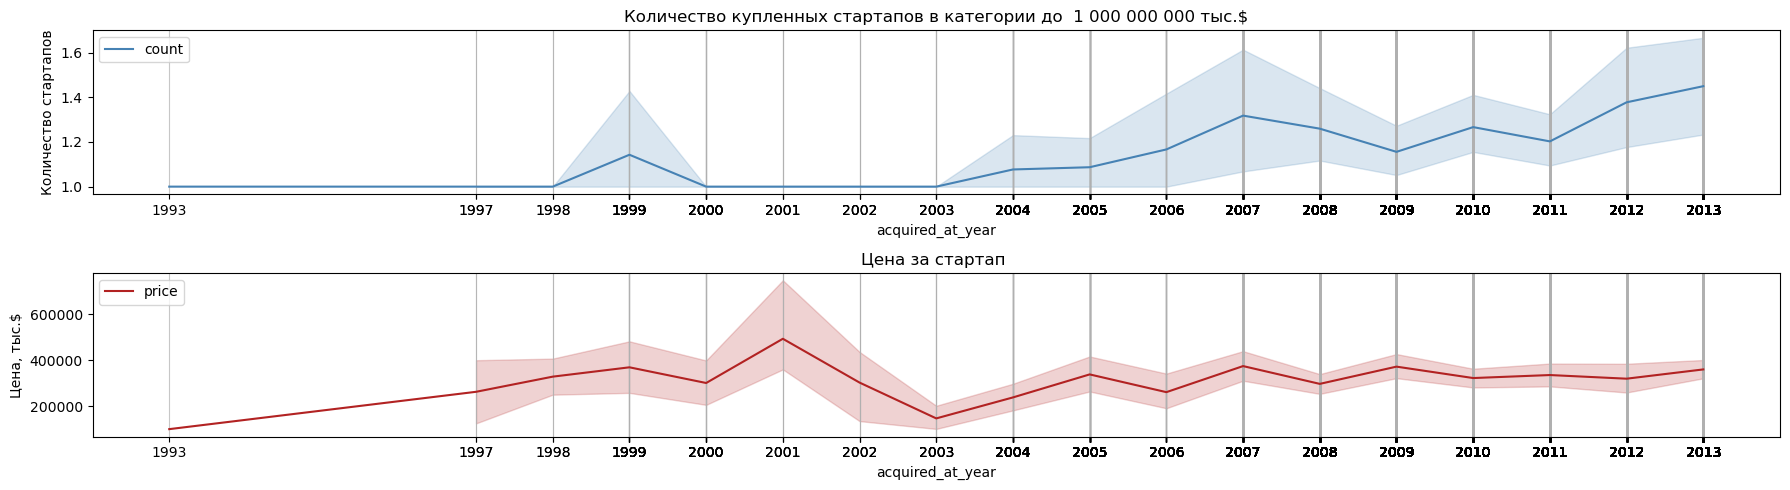

In [121]:
df_1 = cat_maxi[['acquired_at_year', 'count']]
df_2 = cat_maxi[['acquired_at_year', 'price_amount']] 

fig, axes = plt.subplots(2, 1, figsize=(18, 5))

# График 1 - Количество раундов
sns.lineplot(data=df_1, x='acquired_at_year', y='count', ax=axes[0], label='count', color='steelblue')

axes[0].set_title('Количество купленных стартапов в категории до  1 000 000 000 тыс.$')
axes[0].set_ylabel('Количество стартапов')
axes[0].legend(loc='upper left')
axes[0].grid(axis='x', alpha=0.7) 

# Устанавливаем все названия по оси Х
axes[0].set_xticks(ticks=cat_maxi['acquired_at_year'])  # Используем labels для задания имен

# График 2 - Объем финансирования
sns.lineplot(data=df_2, x='acquired_at_year', y='price_amount', ax=axes[1], label='price', color='firebrick')

axes[1].set_title('Цена за стартап ')
axes[1].set_ylabel('Цена, тыс.$')
axes[1].legend(loc='upper left')
axes[1].grid(axis='x', alpha=0.7)

# Устанавливаем все названия по оси Х
axes[1].set_xticks(ticks=cat_maxi['acquired_at_year'])  # Используем labels для задания имен

# Устанавливаем названия по оси Х
plt.xticks()  

# Изменение компоновки графиков
plt.tight_layout()
plt.show()

- Рассмотрим цены стартапов в разрезе категорий столбца `category_code` (датафрейм возьмем отфильтрованный, без выбросов и категории "бесплатно")

In [122]:
# Посчитаем и выведем результат
print('Медиана цены стартапов в разрезе категорий области деятельности компании:')
avg_pa = filter_company_plus_acquisition.groupby('category_code')['price_amount'].median().sort_values(ascending=False)
avg_pa_top = avg_pa.head(10)
display(avg_pa)

Медиана цены стартапов в разрезе категорий области деятельности компании:


category_code
sports              260000.0
analytics           200000.0
fashion             195000.0
medical             165000.0
transportation      125000.0
health               97500.0
cleantech            96000.0
security             95000.0
finance              91500.0
semiconductor        63500.0
travel               62500.0
messaging            57500.0
biotech              56500.0
hospitality          52400.0
ecommerce            46100.0
social               45750.0
photo_video          45000.0
automotive           43000.0
games_video          40000.0
real_estate          40000.0
advertising          39775.0
network_hosting      38250.0
news                 38000.0
software             34670.0
hardware             34000.0
other                32000.0
mobile               32000.0
enterprise           31500.0
manufacturing        31200.0
web                  30000.0
public_relations     25000.0
consulting           24975.0
local                16140.2
search               15000.0


- Для визуального анализа такого распределения используем линейчатаю диаграмму. 

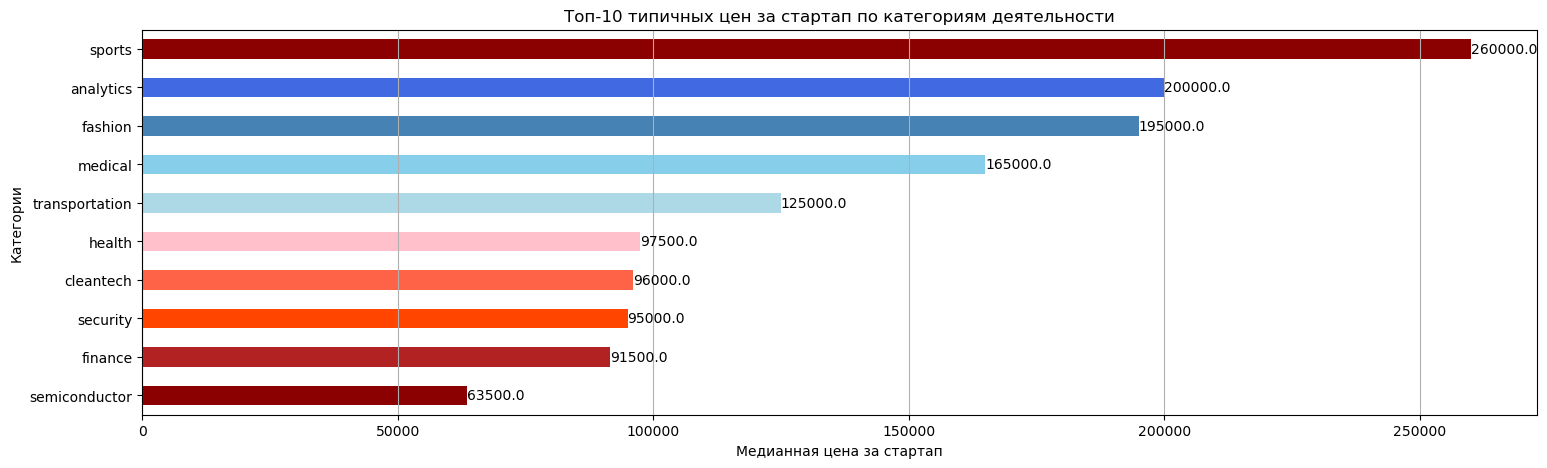

In [123]:
# Сортируем данные по убыванию
avg_pa_sorted = avg_pa_top.sort_values(ascending=True)

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(18, 5))

# Список цветов
colors = ['darkred', 'firebrick', 'orangered', 'tomato', 'pink', 'lightblue', 'skyblue', 'steelblue', 'royalblue']

# Строим линейчатаю диаграмму с помощью pandas через plot(kind='barh')
avg_pa_sorted.plot(
               kind='barh',  # Тип графика - линейчатая диаграмма
               rot=0,  # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               color=colors[:len(avg_pa)],
               title=f'Топ-10 типичных цен за стартап по категориям деятельности'
)

# Добавляем значения на график
for index, value in enumerate(avg_pa_sorted):
    plt.text(value, index, str(value), va='center')
    
# Настраиваем оформление графика
plt.xlabel('Медианная цена за стартап')
plt.ylabel('Категории')

# Добавляем сетку графика
plt.grid(axis='x')

# Выводим график
plt.show()

**По результам исследования можно сказать следующие:**

- Наибольшими цена в категории "выбросы" (максимальная цена продажи стартапа более 2 млрд. долларов)
- Без учета данной категории, наибольшими ценами обладает и с наибольшим разбросом этих цен группа "до 1 000 000 000", из диаграмм выше видны значительно закрашенные области разброса данных.
- Категорию "Бесплатно" можно назвать категорией типичных цен (почти 74% стартапов). Цена до 1 доллара.
- Самая высокая медианная цена продажи стартапов 260 000 тыс. долларов в категории "Storts"
- Наименьшая медианная цена продажи стартапов 4 860 тыс. долларов в категории "Music"

---
#### Задача

Проанализировать столбец `funding_rounds`. Исследовать значения столбца. 

Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

Построить график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайть выводы.

**Сколько раундов продержится стартап перед покупкой**

- Создадим сводную таблицу на основе датафрейма `ft_company_df_new`. Где отобразим количество раундов финансирования и медиану в разрезе годов и статусов
- Визуализируем данные среднего количества раундов в зависимости от статуса стартапа
- Визуализация KDE

In [124]:
# Отфильтруем основной датафрейм (количество раудов больше 0)
df_fr = ft_company_df_new[ft_company_df_new['funding_rounds']>0]

# Создадим сводную таблицу
pivot_fr = ft_company_df_new.pivot_table(index='founded_at_year', 
                                                columns='status', 
                                                values=['funding_rounds'], 
                                                aggfunc=['count', 'mean'], 
                                                margins=True, margins_name='Итого')
# Уберем пустые строки (разгрузим)
pivot_fr = pivot_fr.dropna()
display(pivot_fr)

count                                        mean  \
                funding_rounds                              funding_rounds   
status                acquired closed  ipo operating  Итого       acquired   
founded_at_year                                                              
1969                        11      1    3        11     26       0.090909   
1970                         6      1    1         2     10            0.0   
1972                         6      2    1         8     17            0.0   
1976                         8      2    2        13     25          0.125   
1980                        12      1    7        25     45       0.166667   
1983                        29      2    4        24     59       0.310345   
1984                        35      2    9        30     76       0.142857   
1985                        40      1   13        36     90          0.125   
1987                        42      1    4        37     84       0.214286   
1989                        44      3    8        46    101       0.068182   
1990                        34      3    5        34     76       0.323529   
1991                        36      1    6        51     94       0.222222   
1992                        43      1    3        67    114       0.186047   
1993                        67      3    4        63    137       0.164179   
1994                        66      3    8        85    162       0.242424   
1995                       104      3   15       100    222       0.326923   
1996                       139      5   10       161    315       0.323741   
1997                       160      7   11       187    365           0.45   
1998                       186     10   18       229    443       0.435484   
1999                       299     28   20       399    746       0.638796   
2000                       258     31   14       494    797       0.934109   
2001                       237     22   12       421    692       0.683544   
2002                       234     32    8       452    726       0.910256   
2003                       210     51   13       553    827       1.080952   
2004                       218     59   16       660    953       1.183486   
2005                       255     84    9       841   1189       1.384314   
2006                       294    148    5      1085   1532       1.455782   
2007                       313    207    5      1457   1982       1.140575   
2008                       280    184    7      1520   1991       1.046429   
2009                       261    214    5      1875   2355       1.011494   
2010                       243    217    2      2435   2897       0.847737   
2011                       195    164    3      3096   3458       0.748718   
2012                        76     55    2      2650   2783       0.394737   
2013                        13     10    1       941    965       0.153846   
Итого                     4691   1560  306     20411  26968       0.793434   

                                                         
                                                         
status             closed       ipo operating     Итого  
founded_at_year                                          
1969                  1.0  0.333333  1.090909  0.576923  
1970                  1.0       0.0       0.5       0.2  
1972                  1.0       0.0      0.75  0.470588  
1976                  1.0       0.5  0.692308      0.52  
1980                  4.0  0.285714      0.96  0.711111  
1983                  1.5       0.5  1.208333  0.728814  
1984                  1.5  0.777778  0.933333  0.565789  
1985                  1.0  0.769231  1.083333  0.611111  
1987                  1.0      0.75  1.054054  0.619048  
1989             1.666667      0.75  1.282609  0.722772  
1990             1.333333       0.8  1.176471  0.776316  
1991                  1.0  0.666667   1.27451  0.829787  
1992                  1.0  0.666667  1.119403  0.75438

- Во временном разрезе можно увидель наиболее оживленные годы в отношении финансировании стартапов: 20065-2012 года
- В среднем количество раундов финансирования стартапа в независимости от статуса и года - 1.48

- Визуализируем данные среднего количества раундов в зависимости от статуса стартапа

In [125]:
# Посчитаем и выведем результат
print('Среднее количество раундов в разрезе статусов стартапов:')

avg_fr = df_fr.groupby('status')['funding_rounds'].mean().sort_values(ascending=False)
print(avg_fr)

Среднее количество раундов в разрезе статусов стартапов:
status
ipo          1.988732
acquired     1.825843
operating    1.583863
closed       1.360019
Name: funding_rounds, dtype: Float64


- Для визуального анализа такого распределения используем столбчатую диаграмму

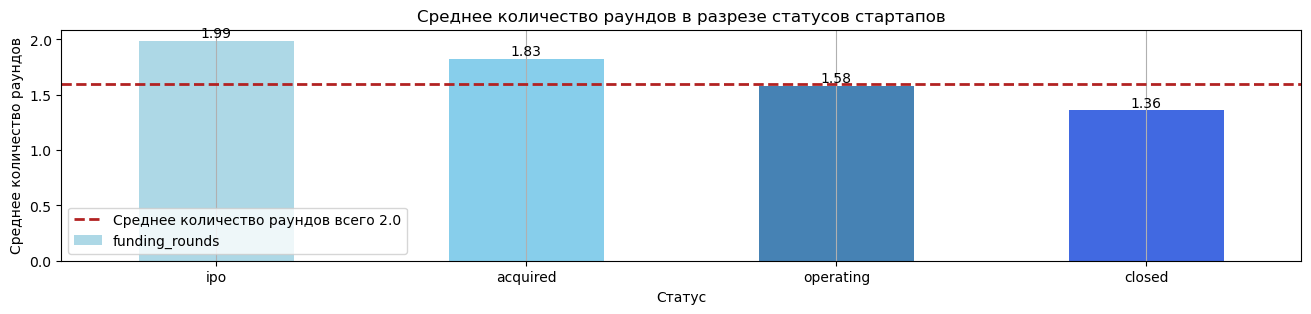

In [126]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16, 3))

# Список цветов
colors = ['lightblue', 'skyblue', 'steelblue', 'royalblue']

# Строим столбчатую диаграмму с помощью pandas через plot(kind='barh')
avg_fr.plot(kind='bar', # Тип графика - линейчатая диаграмма
            rot=0, # Градус вращения подписи по оси Х
            legend=False, # Выключаем легенду
            color=colors[:len(avg_fr)],
            title=f'Среднее количество раундов в разрезе статусов стартапов')

# Добавляем значения на график
for index, value in enumerate(avg_fr):
    plt.text(index, value, str(round(value,2)), ha='center', va='bottom')
    
# Настраиваем оформление графика
plt.xlabel('Статус')
plt.ylabel('Среднее количество раундов')

# Среднее в совокупности
mean_fr = df_fr['funding_rounds'].mean() 

# Наносим на график линию со средним значением 
plt.axhline(mean_fr, # Данные, по которым строится линия
            color='firebrick', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=2, # Ширина линии
            label=f'Среднее количество раундов всего {round(mean_fr,0)}')

# Добавляем сетку графика и легенду
plt.grid(axis='x')
plt.legend(loc='lower left')

# Выводим график
plt.show()

- Визуализируем полученные данные с помощью KDE

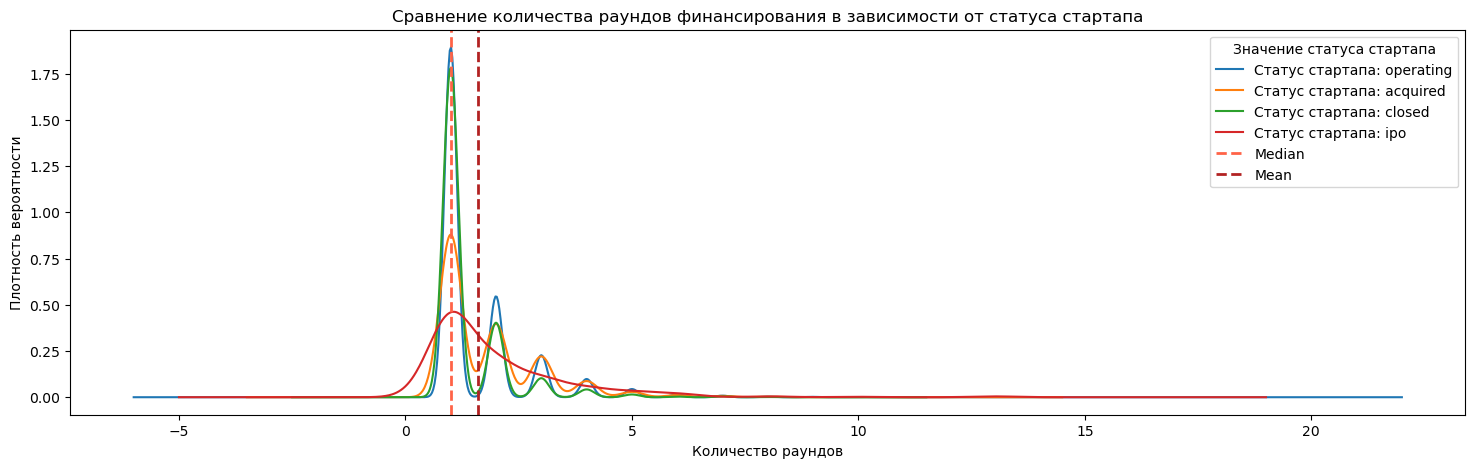

In [127]:
# Создаём фигуру графика
plt.figure(figsize=(18, 5))

# Строим графики KDE для каждого значения price
for i in df_fr['status'].unique(): 
    df_fr.loc[df_fr['status'] == i, 'funding_rounds'].plot(kind='kde',
                                                     alpha=1,
                                                     label=f'Статус стартапа: {i}',
                                                     legend=True)
# Фильтруем данные по значению столбца price
# Добавим на диаграмму среднее и медиану
median = df_fr['funding_rounds'].median()
plt.axvline(median, color='tomato', linestyle='dashed', linewidth=2, label='Median')
mean = df_fr['funding_rounds'].mean()
plt.axvline(mean, color='firebrick', linestyle='dashed', linewidth=2, label='Mean')
            
# Настраиваем внешний вид графика и выводим его на экран
plt.title(f'Сравнение количества раундов финансирования в зависимости от статуса стартапа')
plt.xlabel('Количество раундов')
plt.ylabel('Плотность вероятности')
plt.legend(title='Значение статуса стартапа')

plt.show()

**По результам исследования можно сказать следующие:**

- В данных представленно 4 статуса стартапа: acquired, closed, ipo, operating.
- Больше всего раундов финансирования произходит в статусе operating (76 %)
- Наибольшее среднее количество раундов приходится на статус ipo (1.99).
- Наименьшее среднее количество раундов приходится на статус closed (1.36). 
- Из последнем графике видно отличную от других кривую статуса ipo, что подтверждает наибольшую динамику количества раундов на стартап в этом статусе

- Выведем информацию от итоговом датафрейме

In [128]:
ft_company_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39728 entries, 0 to 217469
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company_id         39728 non-null  Int64  
 1   name               39728 non-null  object 
 2   category_code      34310 non-null  object 
 3   status             39728 non-null  object 
 4   country_code       33744 non-null  object 
 5   investment_rounds  39728 non-null  Int64  
 6   funding_rounds     39728 non-null  Int64  
 7   funding_total      39728 non-null  float64
 8   milestones         39728 non-null  Int64  
 9   founded_at_year    26968 non-null  Int64  
dtypes: Int64(5), float64(1), object(4)
memory usage: 3.5+ MB



## Итоговый вывод и рекомендации


**Общий обзор проделанной работы**

В ходе исследования проанализировали данные о стартапах. В итоговый датафрейм вошло 39 728 строк, включающих наименование и id стартапа, статус, число раундов, сумма и год финансирования. Для дополнительных исследований были присоеденены данные о продажах стартапов. Акцент исследования был на качестве обработки данных, их очистке их и нахождения взаимосвязей между параметрами. 

**Ответы на исследовательские вопросы**

1. Раунды финансирования по годам
- В 2013 году средний объем средств, которые получил стартап в рамках 1 раунда был максимальным и составил 3 909.82 тыс. дол
- В 2003 году средний объем средств, которые получил стартап в рамках 1 раунда был минимальным и составил 1 599.79 тыс. дол
- Средняя сумма финансирования за один раунд в год 2884.22 тыс. дол
- Количество раундов с 1998 по 2013 годы возрастает от года к году с 72 до 23978 в год.

2. Люди и их образование
- Категоризация стартапов произведена по критериям размеров бизнеса: микро - штат не превышает 15, малые от 16 до 100 и Средние до 250 сотрудников. (Так как максимальное количество сотрудников в данных равнялось 244, макро организации не вошли в категории)
- Большиство из имеющих компаний категории "Микро" (4 763 стартапа) со средним количеством сотрудников 3 чел.
- Количество стартапов в данных без указания сотрудников - 18 117 шт.
- Присоединение датафрейма с информацией о типе образования сотрудника возможно, но по итогу мы получаем данные с большим количеством пробелов.

3. Объединять или не объединять
- Столбец `network_username` не подходит для объединения датафреймов, так как данные из этого столбца совпадают только в 2,7%.

4. Проблемный датасет и причина возникновения пропусков
- Датафрей `company_and_rounds_df` был разделен на 2 датафрейма, с учетом анализа пропусков.
- В итоговый датафрейм преодбработки `company_df` вошло 10 столбцов и 196 552 строк

5. Объединение данных
- Отфильтровали итоговый датафрейм `company_df` по заданию  (значения раундов финансирования или инвестиционных раундов больше нуля, или те, у которых в колонке `status` указано `acquired`
- В результате получен датафрейм `filter_company_df` по данным о компаниях и о раундах финансирования в котором 10 столбцов и 40 747 строк
- Остальные датафреймы были присоеденены в случае необходимости

6. Анализ выбросов
- Была построена гистограмма логарифмически преобразованного столбца `fundinf_total`, которая близка к нормальному распределению, медиана и среднее находятся рядом, но диаграмма размаха выявляет большое количество выбросов как в большую, так и в меньшую сторону.
- Произвели корректировку данных самого столбца `fundinf_total`с помощью процентилей уберали 5 % выбрасов, в пределах допустимой ошибки данных.
- Получили финальный датафрейм `ft_company_df_new` с корреретрировкой на выбросы (количество строк 39 728)
- Статистические данные финального столбца `fundinf_total` выявляют следующее:
    - 97 % стартапов получили финансирования в районе до 74 000 тыс. долларов
    - Гистограмма правого распределения, говорит о том, что чем больше сумма финансирования, тем меньшее количество стартапов ее получили. 
    - Медианное значение 500 тыс. долларов

7. Куплены забесплатно
- Объединили финальный датафрейм `ft_company_df_new` и датафрейм с информацией о покупках одними компаниями других компаний `acquisition_df` 
- В итоге получили датафрейм `company_plus_acquisition` в котором 9 286 строк
- Из диаграммы распределения проданных стартапов за доллар ("бесплатно") и остальных отмечаем преобладание продаж в 3 раза в категории "бесплатно" (74,3% к 25,7%)
- Оценка корреляции по категории продаж ("бесплатные"/"за деньги") показала очень слабые связи.
- Наибольшая положительная корреляция с данными столбца `funding_total` - 0.16
- Анализ взаимосвязей данных о раундах и сумм финансирования в зависимости от года продажи (с 1984 по 2013 годы) показали следующее:
    - Взаимосвязь данных о количествое продаж "бесплатно"/"за деньги": количество "бесплатных" продаж до 2011 имела тенденцию роста, после начинается падение. Линия продаж стартапов "за деньги" до 2008 года плавный рост, затем плавный спад до 2012 и снова рост.
    - Взаимосвязь данных о количестве раундов финансирования стартапа и продаж "бесплатно"/"за деньги": в общем оба вида продаж имеют тенденцию к росту с ростом количества раундов финансирования, график продаж "за деньги" имеет большую динамику (скачки).
    - Взаимосвязь данных о сумме финансирования стартапов и продаж"бесплатно"/"за деньги": график "бесплатных" продаж имеет плавный рост, т.е. объемы финансирования растут меделеннно, как и количество "бесплатных" продаж. График продаж "за деньги можно поделить на три периода: с 1993 по 2001 скачки, с 2001 по 2012 рост и падение в 2013 году.

8. Цены стартапов по категориям
- Из диаграмм распредения по столбцу `price_amount` (цена продажи стартапа) датафрейма `company_plus_acquisition` видно большое количество выбросов (высоких цен стартапов), которые вытягивают хвоcт гистораммы вправо.
- Медиана равна 30,4 млн. долларов без учета "бесплатных" продаж и 5% выбросов.
- Общая медиана продажи всех стартаповов стремится к 0, что говорит о большом количестве "бесплатных" и малооплачиваемых стартапов.
- Итог логичный, чем больше цена продажи, тем меньше таких стартапов.
- Категоризировали данные по цене продажи стартапа на следующие категории (долларов): "Бесплатно", "до 1000", "до 10000", "до 100000", "до 1000000", "до 10000000", "до 100000000", "до 1000000000", "выбросы".
- Наибольшие цены в категории "выбросы" (максимальная цена продажи стартапа более 2 млрд. долларов)
- Без учета данной категории, наибольшими ценами обладает и с наибольшим разбросом этих цен группа "до 1 000000000", что подтверждается диаграммами с областями разброса данных.
- Категорию "Бесплатно" можно назвать категорией типичных цен (74% стартапов). Цена до 1 доллара.
- Самая высокая медианная цена продажи стартапов 260 000 тыс. долларов в категории "Storts"
- Наименьшая медианная цена продажи стартапов 4 860 тыс. долларов в категории "Music"

9. Сколько раундов продержится стартап перед покупкой
- На основании финального датафрейма `ft_company_df_new` среднее количество раундов в разрезе статусов стартапов: acquired - 1.83, closed - 1.36, ipo - 1.99, operatin - 1.58.
- Больше всего раундов финансирования проиcходит в статусе operating (76 %)
- Во временном разрезе можно увидеnm наиболее оживленные годы в отношении финансировании стартапов: 2005-2012 года
- Анализ данных с помощью линий KDE демонстрирует отличную от других кривую статуса ipo, что подтверждает наибольшую динамику количества раундов на стартап в этом статусе

**Итоговый вывод и рекомендации**
- В итоге подготовили датасет и проверили, что данные в нём соответствуют здравому смыслу, а также ответили на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.
- К сожалению основываясь на предоставленных данных дать рекомемендации по покупке стартапов не представляется возможным, так как 74% стартапов были проданы "бесплатно". Причины этого не известны и нуждаются в дополнительных данных и анализе.